<center><h1><u></u>$\color{#454775}{\bf \underline {Analyzing\;Marketing\;Campaigns}}$</u></h1></center><br>


## $\color{#454775}{\bf Importing\;Liberaries}$

In [285]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
#from matplotlib.ticker import FuncFormatter
import seaborn as sns

<br>

## $\color{#454775}{\bf The\;Dataset}$

In [286]:
#Loading The Marketing Dataset
marketing=pd.read_csv('marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


<br>

## $\color{#454775}{\bf Data\;Assessing}$
### $\color{#454775}{\sf 1-\;Data\;Types\;and\;Null\;Values:}$

In [287]:
# Examining data types & null values: 
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


<br>

### $\color{#454775}{\sf 2-\;Dataset\;Description:}$

In [288]:
# Dataset Description:
print(f'- The Marketing Dataset consists of {marketing.shape[0]} Rows and {marketing.shape[1]} Columns')

print (f'\n- The dataset consists of {marketing.user_id.nunique()} user.\n')

print(f'''
- The Data Selection: 
    Start: {marketing.date_served.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_served.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')

print(f'''
- The Subscription Dates: 
    Start: {marketing.date_subscribed.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_subscribed.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')

print(f'''
- The Subscription Cancellation occured within: 
    Start: {marketing.date_canceled.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_canceled.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')

print('- The Marketing Channels are as follows:')
for x, y in enumerate(marketing.marketing_channel.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Variant categories are as follows:')
for x, y in enumerate(marketing.variant.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Converted column is classified into:')
for x, y in enumerate(marketing.converted.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Displayed Languages are as follows:')
for x, y in enumerate(marketing.language_displayed.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Preferred Languages are as follows:')
for x, y in enumerate(marketing.language_preferred.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Age Groups are classified as follows:')
for x, y in enumerate(marketing.age_group.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Subscribing Channels are as follows:')
for x, y in enumerate(marketing.subscribing_channel.unique()): 
    print('  ',x+1, '-', y)

print('\n- The is_retained column is classified into:')
for x, y in enumerate(marketing.is_retained.unique()): 
    print('  ',x+1, '-', y)

- The Marketing Dataset consists of 10037 Rows and 12 Columns

- The dataset consists of 7309 user.


- The Data Selection: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Dates: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Cancellation occured within: 
    Start: 2018-01-05 
    End  : 2018-05-09

- The Marketing Channels are as follows:
   1 - House Ads
   2 - Push
   3 - Facebook
   4 - Instagram
   5 - Email
   6 - nan

- The Variant categories are as follows:
   1 - personalization
   2 - control

- The Converted column is classified into:
   1 - True
   2 - False
   3 - nan

- The Displayed Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Preferred Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Age Groups are classified as follows:
   1 - 0-18 years
   2 - 19-24 years
   3 - 24-30 years
   4 - 30-36 years
   5 - 36-45 years
   6 - 45-55 years
   7 - 55+ y

<br>

### $\color{#454775}{\sf 3-\;Summary\;Statistics:}$

In [289]:
# Summary Statistics
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


<br>

### $\color{#454775}{\sf 4-\;Duplicated\;Values:}$

In [290]:
# Identifying Duplicated Values:
if marketing.duplicated().sum() == 0: 
    print('The Dataset has no Duplicated Values')
else: 
    print(f'''
- The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}"''')


- The Dataset has 37 Duplicated rows and their indexes are as follows:
 
"470, 478, 894, 895, 954, 955, 1004, 1005, 1027, 1047, 1051, 3022, 3166, 3196, 3198, 3310, 3498, 3642, 3801, 3803, 4083, 4124, 4129, 4134, 6880, 7440, 7488, 8452, 8454, 8456, 8458, 8486, 8488, 8500, 8502, 8504, 8506"


<br>

### $\color{#454775}{\sf 5-\;Missing\;Values:}$

In [291]:
# Identifying the Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 34049 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,16
marketing_channel,15
variant,0
converted,15
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8181
date_canceled,9460


In [292]:
# Detemining the indexes of the null values for columns:
# 1- date_served
print(f'''
- The date_served column has {marketing.date_served.isna().sum()} null values and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}"\n''') 

# 2- marketing_channel
print(f'''
- The marketing_channel column has {marketing.marketing_channel.isna().sum()} null values and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.marketing_channel.isna()==True].index.to_list()))}"\n''') 

# 3- converted
print(f'''
- The converted column has {marketing.converted.isna().sum()} null values and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.converted.isna()==True].index.to_list()))}"\n''')


- The date_served column has 16 null values and their indexes are as follows:
 
"7038, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The marketing_channel column has 15 null values and their indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The converted column has 15 null values and their indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"



>$\color{#454775}{Note}:$<br>
> _The three columns share the same missing rows (except for date_served index 7038 )_

<br>

## $\color{#454775}{\bf Data\;Cleaning}$
### $\color{#454775}{\sf 1-\;Removing\;Duplicates:}$


In [293]:
marketing.drop_duplicates(inplace=True)
if marketing.duplicated().sum() == 0: 
    print(f'The Dataset has no Duplicated Values with {marketing.shape[0]} Row')
else: 
    print(f'''
The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}''')

The Dataset has no Duplicated Values with 10000 Row


In [294]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10000,9984,9985,10000,9985,10000,10000,10000,1845,575,1845,1845
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/1/18,Instagram,True
freq,12,786,4704,5069,8911,9757,9243,1676,162,14,594,1270


<br>

### $\color{#454775}{\sf2-\;Changing\;Dates\;Data\;Types:}$
- ***date_served:*** _str_ to _date_
- ***date_subscribed:*** _str_ to _date_
- ***date_canceled:*** _str_ to _date_


In [295]:
# Changing the data type of date_served: 
marketing['date_served']=pd.to_datetime(marketing['date_served'])

# Changing the data type of date_subscribed: 
marketing['date_subscribed']=pd.to_datetime(marketing['date_subscribed'])

# Changing the data type of date_canceled: 
marketing['date_canceled']=pd.to_datetime(marketing['date_canceled'])

marketing.loc[:,['date_served','date_subscribed','date_canceled']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_served      9984 non-null   datetime64[ns]
 1   date_subscribed  1845 non-null   datetime64[ns]
 2   date_canceled    575 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 312.5 KB


<br> 

### $\color{#454775}{\sf 3-\;Handling\;Nulls:}$
##### ***$\color{#454775}{a)}$ Shared nulls across date_served (except for index 7038), marketing_channel, converted:*** 
Since those columns share the same missing rows, dropping them together avoids keeping incomplete entries that would otherwise distort the analysis.<br>
##### ***$\color{#454775}{b)}$ date_served (index 7038):*** 
Since this is an isolated null in the middle of the dataset, forward-filling (ffill) after sorting by date is a reasonable strategy.<br>
##### ***$\color{#454775}{c)}$ date_subscribed:***
1. ***As a Precautionary measure,*** if the user converted,the missing values (if any) would be replaced with **date_served**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>
##### ***$\color{#454775}{d)}$ date_canceled:*** 
There is no need to handle its missing values in as these values are naturally missing depending on whether the user canceled his subscription or not. Filling them would introduce bias.<br>
##### ***$\color{#454775}{e)}$ subscribing_channel*** 
1. ***As a Precautionary measure,*** if the user converted,the missing values (if any) would be replaced with **marketing_channel**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>
##### ***$\color{#454775}{f)}$ is_retained:*** 
1. ***As a Precautionary measure,*** if the user converted and there is no mention for canceling the subscription ,the missing values (if any) would be replaced with **True**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>

In [296]:
# Dropping Shared nulls across date_served (except for index 7038), marketing_channel, converted: 
marketing.dropna(subset='marketing_channel', inplace=True)

In [297]:
# Nulls at date_served column 
print(f'''
The date_served column has {marketing.date_served.isna().sum()} null value and its index is {", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}\n''')


The date_served column has 1 null value and its index is 7038



In [298]:
# date_served (index 7038):
# Sorting the table by date served
marketing=marketing.sort_values('date_served') 

# Replacing null by forward fill method 
marketing.date_served.fillna(method='ffill', inplace=True)

# Checking:
if marketing.date_served.isna().sum() == 0: 
    print(f'\nThe Null values in date_served Column has been handeled, resulting in a {marketing.date_served.isna().sum()} Null Value for this column\n')
else: 
    print(f'''The date_served Column has {marketing.date_served.isna().sum()} NULL Values ''')


The Null values in date_served Column has been handeled, resulting in a 0 Null Value for this column



In [299]:
# date_subscribed:
marketing['date_subscribed']= np.where(np.logical_and(marketing.converted==True,marketing.date_subscribed.isna()==True),
                                       marketing.date_served,marketing.date_subscribed)

In [300]:
# subscribing_channel:
marketing['subscribing_channel']= np.where(np.logical_and(marketing.converted==True,marketing.subscribing_channel.isna()==True),
                                           marketing.marketing_channel,marketing.subscribing_channel)

In [301]:
#is_retained:
marketing['is_retained']= np.where(np.logical_and(marketing.converted==True,marketing.is_retained.isna()==True,marketing.date_canceled.isna()==True),
                                   True,marketing.is_retained)

In [302]:
# Checking for Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 33752 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,0
marketing_channel,0
variant,0
converted,0
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8114
date_canceled,9410


<br>

### $\color{#454775}{\sf 4-\;Changing\;converted\;Data\;Type:}$
- ***converted:*** _str_ to _boolean_

In [303]:
# Changing the data type of converted: 
marketing['converted']=marketing['converted'].astype('bool')
marketing['converted'].dtype

dtype('bool')

<br>

### $\color{#454775}{\sf 5-\;Adding\;New\;Columns:}$
- ***is_house_ad:*** Identifies if a particular marketing asset was a house ad or not _(since it is the most frequent value in this column "4733 out of 10000")_
- ***matched_lang:*** conveys whether the ad was shown to the user in their preferred language
- ***dow:*** service Days starting from Monday till Sunday, t measure the most frequent days
- ***ad_repeated:*** to check whether the user saw the ad multiple times

In [304]:
# Adding the is_house_ad Column
marketing['is_house_ad']=[
    True if x=="House Ads" 
    else False for x in marketing.marketing_channel]
marketing.loc[:,['marketing_channel','is_house_ad']].sample(5)

,marketing_channel,is_house_ad
8327,Instagram,False
5802,Facebook,False
1473,Push,False
2031,House Ads,True
3721,House Ads,True


In [305]:
# Adding matched_lang Column 
marketing['matched_lang']=np.where(marketing['language_displayed']==marketing['language_preferred'],True,False)
marketing.loc[:,['language_displayed','language_preferred','matched_lang']].sample(5)

,language_displayed,language_preferred,matched_lang
3001,English,English,True
9402,English,English,True
518,English,English,True
4143,English,English,True
9670,English,English,True


In [306]:
# Adding dow column: 
marketing['dow']= ['Mo' if x==0
                  else 'Tu' if x== 1
                  else 'We' if x==2
                  else 'Th' if x==3
                  else 'Fr' if x==4
                  else 'Sa' if x==5
                  else 'Su'for x in marketing.date_served.dt.dayofweek]
marketing.loc[:,['date_served','dow']].sample(5)


,date_served,dow
6032,2018-01-15,Mo
2085,2018-01-16,Tu
7460,2018-01-22,Mo
1176,2018-01-02,Tu
6175,2018-01-06,Sa


In [307]:
# Adding ad_repeated column: 
is_repeated_user = marketing.user_id.value_counts()>1

repeated=is_repeated_user.reset_index().rename(columns={'index':'user_id','user_id':'repeated'})\
                         .query('repeated==True').user_id.to_list()


marketing['ad_repeated']=[True if x in repeated else False for x in marketing.user_id]

marketing.loc[:,['user_id','ad_repeated']].head()

,user_id,ad_repeated
0,a100000029,False
829,a100000877,True
6672,a100004321,True
6670,a100004320,True
6668,a100004319,True


<br>

### $\color{#454775}{\sf 6-\;Mapping\;Values\;to\;Existing\;Columns:}$

> $\color{#454775}{Note}:$<br>
>_Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers._

- ***marketing_channel*** will be as follows:
   - _House Ads = 1_
   - _Push = 2_
   - _Facebook = 3_
   - _Instagram = 4_
   - _Email = 5_

In [308]:
# Mapping marketing_channel column:
ch_dict={'House Ads' : 1,'Push' : 2,'Facebook' : 3,'Instagram' : 4,'Email' : 5}
marketing['ch_code']=marketing.marketing_channel.map(ch_dict).astype('Int64')
marketing.loc[:,['marketing_channel','ch_code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 7038
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketing_channel  9985 non-null   object
 1   ch_code            9985 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 243.8+ KB


<br>

## $\color{#454775}{\bf Data\;Exploring}$
### $\color{#454775}{\sf Initial\;Investigation:}$
#### $\color{#454775}{1-}$ *Number of Daily users:*

In [309]:
# Number of daily users :
daily_users = marketing.groupby(['date_served','dow']).user_id.count().reset_index()\
                        .rename(columns={'date_served':'date','user_id':'num_users'})

daily_users['date']=daily_users.date.dt.date 

daily_users.style.hide()

date,dow,num_users
2018-01-01,Mo,375
2018-01-02,Tu,413
2018-01-03,We,383
2018-01-04,Th,336
2018-01-05,Fr,331
2018-01-06,Sa,315
2018-01-07,Su,280
2018-01-08,Mo,319
2018-01-09,Tu,315
2018-01-10,We,341


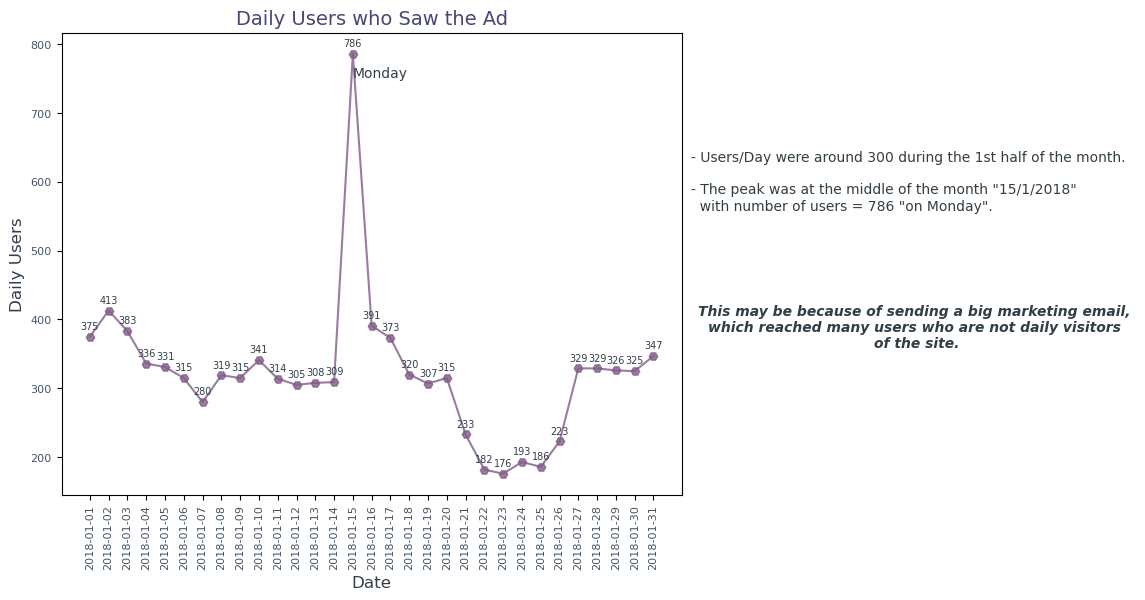

In [310]:
# Visualization - Number of daily users : 
# Data
d_u_date= daily_users.date.astype('str').to_list()
d_u_num= daily_users.num_users

# Creating the Line Chart
plt.subplots(figsize = (8,6))
plt.plot(d_u_date,d_u_num,color='#805D87',marker = 'H', alpha=.8)

# Customizing Chart
plt.title('Daily Users who Saw the Ad',fontsize=14,color='#454775')

plt.xlabel('Date',fontsize=12,color='#313E4C')
plt.xticks(rotation=90,fontsize=8,color='#415366')

plt.ylabel('Daily Users',fontsize=12,color='#313E4C')
plt.yticks(fontsize=8,color='#415366')

# Data Annotation with values
for i, v in enumerate(d_u_num):
  plt.text(i,v+15, f"{v:.0f}", ha='center', va='center',fontsize=7,color='#313E4C')

# Findings
text_d_u =f'''
- Users/Day were around 300 during the 1st half of the month.\n
- The peak was at the middle of the month "15/1/2018" \n  with number of users = {d_u_num.max()} "on Monday".\n'''

text2_d_u='''
This may be because of sending a big marketing email, \nwhich reached many users who are not daily visitors \nof the site.'''

plt.text(32,600,text_d_u,va='center',ha='left',color='#313E45')
plt.text(44,400,text2_d_u,va='center',ha='center',color='#313E45',fontstyle='italic',weight='semibold', fontsize=10)
plt.text('2018-01-15', 767, 'Monday',va='top', ha='left',color='#313E4C');

<br> 

#### $\color{#454775}{2-}$ *Number of Weekday users:*

In [311]:
# Number of weekday users :
weekday_users = marketing.groupby(['dow']).user_id.count().reset_index()\
                        .rename(columns={'dow':'day','user_id':'num_users'})\
                        .sort_values('num_users', ascending=False)

weekday_users.style.hide()

day,num_users
Mo,1988
We,1637
Tu,1620
Sa,1267
Fr,1166
Th,1156
Su,1151


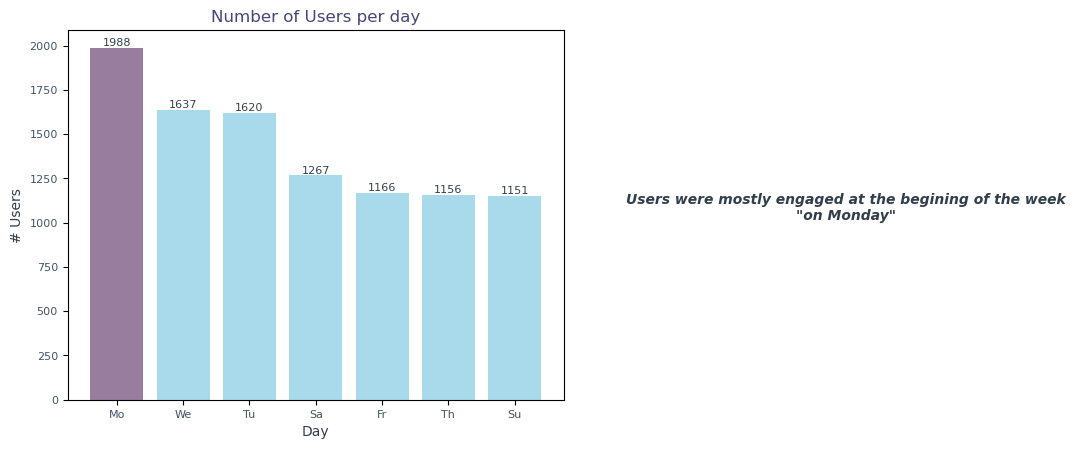

In [312]:
# Visualization - Number of weekday users:
# Data
w_day= weekday_users.day.to_list()
w_num=weekday_users.num_users

# Define bar colors based on performance
colors = ['#805D87' if n == w_num.max() else '#94D1E7' for n in w_num]

# Create the bar chart
plt.bar(w_day,w_num, color=colors, alpha=.8)

# Customizing Chart
plt.title('Number of Users per day',fontsize=12,color='#454775')

plt.xlabel('Day',fontsize=10,color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('# Users',fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

# Annotate bars with their values
for i, v in enumerate(w_num):
  plt.text(i,v+.003, f"{v:.0f}", ha='center', va='bottom',fontsize=8,color='#313E4C') 

# Findings
text_w = ''' 
Users were mostly engaged at the begining of the week\n"on Monday"'''
plt.text(11,1000,text_w,va='bottom',ha='center' ,color='#313E4C',fontstyle='italic',weight='semibold',fontsize=10);

<br> 

#### $\color{#454775}{3-}$ *Number of users according to variant classification:*

In [313]:
# Number of users according to variant categories 
var_users = marketing.groupby('variant')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})

var_users['pct']=(var_users.num_users/var_users.num_users.sum())

var_users.style.hide().format({'pct':'{:,.2%}'})

variant,num_users,pct
control,5054,50.62%
personalization,4931,49.38%


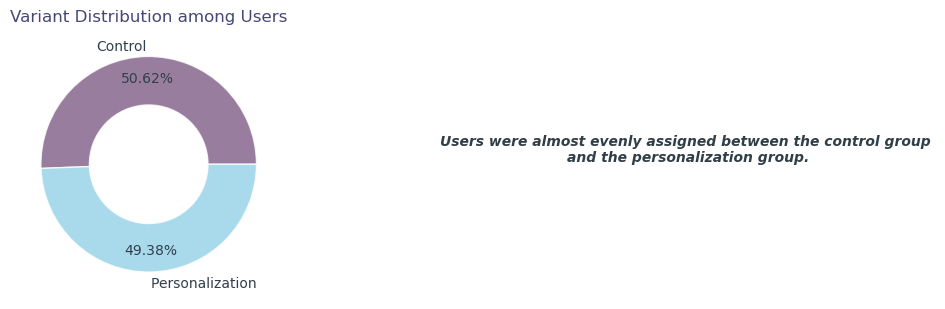

In [314]:
# Visualization - Number of users according to variant categories: 
# Defining colors based on performance
colors = ['#805D87' if x == var_users.pct.max() else '#94D1E7' for x in var_users.pct]

# Creating the Chart
size = 0.45
label_var = 'Control','Personalization '
plt.subplots(figsize = (3.5,3.5))
wedges, texts, autotexts=plt.pie(var_users.pct, radius=1, colors= colors,labels = label_var,autopct='%1.2f%%',pctdistance=.8,
                                 textprops={'fontsize': 10,'color':'#313E4C'}, wedgeprops=dict(width=size, edgecolor='w'))

# Customizing Chart
for w in wedges:
    w.set_alpha(0.8)  

plt.title('Variant Distribution among Users', fontsize=12,color='#454775')

# Findings
text_v = ''' 
Users were almost evenly assigned between the control group \nand the personalization group.'''
plt.text(5,0,text_v,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45');

<br> 

#### $\color{#454775}{4-}$ *Number of converted users vs. non-converted users:*

In [315]:
# Number of converted users vs. non-converted users
converted_users = marketing.groupby('converted')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})

converted_users['pct']=(converted_users.num_users/converted_users.num_users.sum())

converted_users.style.hide().format({'pct':'{:,.2%}'})

converted,num_users,pct
False,8911,89.24%
True,1074,10.76%


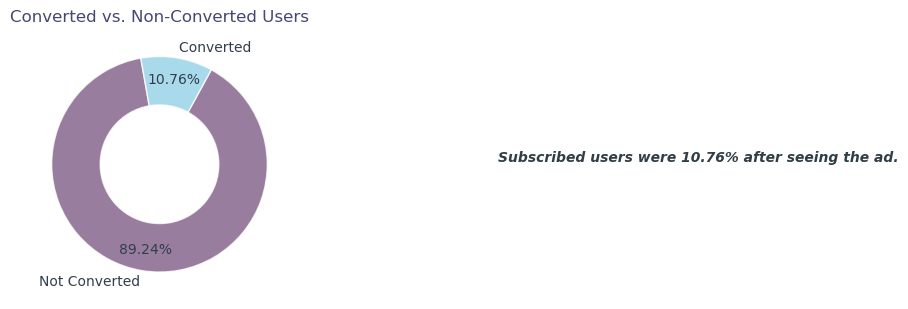

In [316]:
# Visualization - Number of converted users vs. non-converted users: 
# Defining colors based on performance
colors = ['#805D87' if n == converted_users.pct.max() else '#94D1E7' for n in converted_users.pct]

# Creating the Chart
size = 0.45
label_con = 'Not Converted','Converted '
plt.subplots(figsize = (3.5,3.5))
wedges, texts, autotexts=plt.pie(converted_users.pct, radius=1, colors= colors,labels = label_con,autopct='%1.2f%%', pctdistance=.8,
                                 textprops={'fontsize': 10,'color':'#313E4C',}, wedgeprops=dict(width=size, edgecolor='w'),startangle=100)

# Customizing the Chart
for w in wedges:
    w.set_alpha(0.8) 
    
plt.title('Converted vs. Non-Converted Users', fontsize=12,color='#454775')

# Findings
text_c = f''' 
Subscribed users were {converted_users.pct.min():.2%} after seeing the ad.'''
plt.text(5,0,text_c,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45');

<br> 

#### $\color{#454775}{5-}$ *Displayed Lanaguage vs. Preferred Language:*

In [317]:
# Displayed Lanaguage vs. Preferred Language
lang_displayed=marketing.groupby('language_displayed')['user_id'].count().reset_index()\
                        .rename(columns={'language_displayed':'Language','user_id':'Displayed'})

lang_preferred=marketing.groupby('language_preferred')['user_id'].count().reset_index()\
                       .rename(columns={'language_preferred':'Language','user_id':'Preferred'})

lang=lang_displayed.merge(lang_preferred,on='Language').sort_values('Displayed')

lang.style.hide()

Language,Displayed,Preferred
Arabic,27,145
German,81,166
Spanish,135,446
English,9742,9228


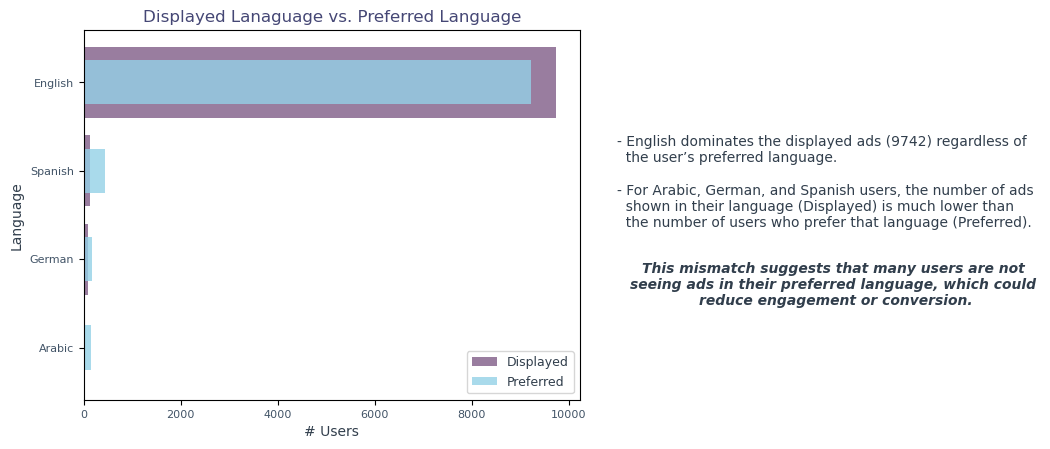

In [318]:
# Visualization - Displayed Lanaguage vs. Preferred Language:
# Data
l_lang=lang.Language.to_list()
l_dis=lang.Displayed
l_pre=lang.Preferred

# Creating the Chart
bin_size=.5
plt.barh(l_lang,l_dis, label='Displayed',color='#805D87',alpha=.8)
plt.barh(l_lang,l_pre,bin_size,label='Preferred', color='#94D1E7',alpha=.8)

# Chart Customization
plt.title('Displayed Lanaguage vs. Preferred Language', fontsize=12,color='#454775')

plt.xlabel('# Users', fontsize=10,color='#313E4C')
plt.xticks(fontsize=8,color='#415366')

plt.ylabel('Language', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8,color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C')

# Findings
text_l=f'''
- English dominates the displayed ads ({l_dis.max()}) regardless of \n  the user’s preferred language.\n
- For Arabic, German, and Spanish users, the number of ads \n  shown in their language (Displayed) is much lower than 
  the number of users who prefer that language (Preferred).\n
'''
text2_l='''
This mismatch suggests that many users are not \nseeing ads in their preferred language, which could \nreduce engagement or conversion.
'''
plt.text(11000,1,text_l,color='#313E4C'),
plt.text(15500,.3,text2_l, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C');

<br> 

#### $\color{#454775}{6-}$ *Distribution of age among users:*

In [319]:
# Distribution of age among users
age_distribution = marketing.groupby('age_group').user_id.nunique().reset_index()\
                            .rename(columns={'user_id':'num_users'})

age_distribution['pct']=age_distribution.num_users/age_distribution.num_users.sum()

age_distribution.style.hide().format({'pct':'{:,.2%}'})

age_group,num_users,pct
0-18 years,1206,15.31%
19-24 years,1304,16.56%
24-30 years,1218,15.46%
30-36 years,1057,13.42%
36-45 years,1056,13.41%
45-55 years,1056,13.41%
55+ years,979,12.43%


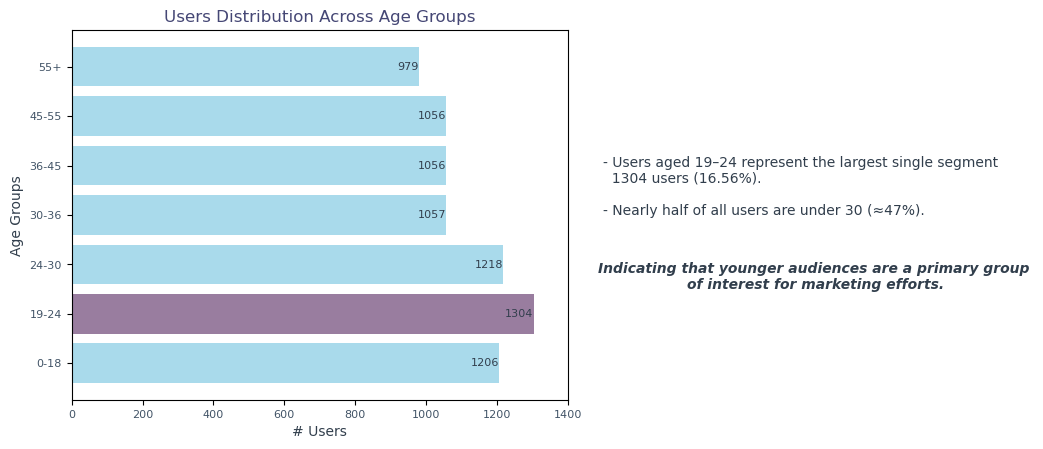

In [320]:
# Visualization - Distribution of age among users:
# Data
age_d_group= [x.replace(' years','') for x in age_distribution.age_group.to_list()]
age_d_num=age_distribution.num_users

# Defining colors based on performance
colors = ['#805D87' if n == age_d_num.max() else '#94D1E7' for n in age_d_num] 

# Creating the chart
plt.barh(age_d_group,age_d_num,alpha=.8,color=colors)

# Customizing the Chart
plt.title('Users Distribution Across Age Groups', fontsize=12,color='#454775')

plt.xlabel('# Users', fontsize=10,color='#313E4C')
plt.xticks(np.arange(0,1500,200),fontsize=8, color='#415366')

plt.ylabel('Age Groups', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

# Annotating bars with values
for i,v in enumerate(age_d_num):
    plt.text(v,i,v,va='center',ha='right',fontsize=8,color='#313E4C')
    
# Findings
text_age_d= f'''
- Users aged 19–24 represent the largest single segment\n  {age_d_num.max()} users ({age_distribution.pct.max():.2%}).\n
- Nearly half of all users are under 30 (≈47%).'''
text2_age_d=''' 
Indicating that younger audiences are a primary group \nof interest for marketing efforts.'''
plt.text(1500,3,text_age_d,color='#313E4C')
plt.text(2100,1.5,text2_age_d, ha='center',fontstyle='italic', weight='semibold', fontsize=10, color='#313E4C');

<br> 

#### $\color{#454775}{7-}$ *Marketing Channels:*

In [321]:
# Number of users for each marketing channel:
ch_users=marketing.groupby('marketing_channel').user_id.count().reset_index().rename(columns={'user_id':"num_users"})\
                  .sort_values('num_users')

ch_users['pct']=ch_users.num_users/ch_users.num_users.sum()

ch_users.style.hide().format({'pct':'{:.2%}'})

marketing_channel,num_users,pct
Email,563,5.64%
Push,991,9.92%
Facebook,1859,18.62%
Instagram,1868,18.71%
House Ads,4704,47.11%


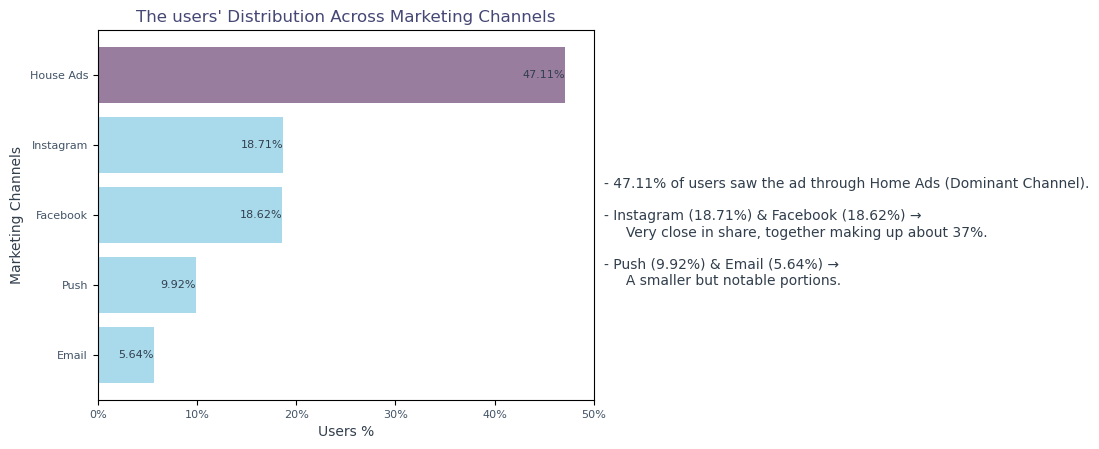

In [322]:
# Visualization - Number of users for each marketing channel:
# Data
ch_u_mc= ch_users.marketing_channel.to_list()
ch_u_pct= ch_users.pct

# Defining colors based on performance
colors = ['#805D87' if n == ch_u_pct.max() else '#94D1E7' for n in ch_u_pct] 

# Creating the chart
plt.barh(ch_u_mc,ch_u_pct, color=colors, alpha=.8)

#Customizing the chart
plt.title("The users' Distribution Across Marketing Channels", fontsize=12,color='#454775')

plt.xlabel('Users %', fontsize=10,color='#313E4C')
plt.xticks(np.arange(0,.6,.1),[f'{x:.0%}' for x in np.arange(0,.6,.1)], fontsize=8, color='#415366')

plt.ylabel('Marketing Channels', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

# Annotating bars with values
for i, v in enumerate(ch_u_pct):
    plt.text(v,i,f'{v:.2%}',ha='right', va='center',fontsize=8,color='#313E4C')

# Findings
text_ch_u=f'''
- {ch_u_pct.max():.2%} of users saw the ad through Home Ads (Dominant Channel).\n
- Instagram ({ch_users.iloc[3,2]:.2%}) & Facebook ({ch_users.iloc[2,2]:.2%}) → 
     Very close in share, together making up about 37%.\n
- Push ({ch_users.iloc[1,2]:.2%}) & Email ({ch_users.iloc[0,2]:.2%}) → 
     A smaller but notable portions.'''
plt.text(.51,1,text_ch_u,color='#313E4C');

In [323]:
# Subscribing Channels
sub_channel=marketing.groupby('subscribing_channel')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':'subscribers_num'})\
                     .sort_values('subscribers_num')

sub_channel.style.hide()

subscribing_channel,subscribers_num
Push,167
Email,312
House Ads,354
Facebook,444
Instagram,594


In [324]:
# Retained Subscribers 
retained = marketing.query('is_retained == True').groupby('subscribing_channel').is_retained.count().reset_index()\
                    .rename(columns={'is_retained':'retained_num'}).sort_values('retained_num') 

retained.style.hide()

subscribing_channel,retained_num
Push,122
House Ads,198
Email,237
Facebook,320
Instagram,419


In [325]:
# Merging subscribing channeles and retained subscribers
subscribers = sub_channel.merge(retained,on='subscribing_channel')

subscribers['retained_pct']=subscribers['retained_num']/subscribers['subscribers_num']

subscribers['middle_pt']=(subscribers['subscribers_num']/2)

subscribers.style.hide().format({'retained_pct':'{:.2%}','middle_pt':'{:.0f}'})

subscribing_channel,subscribers_num,retained_num,retained_pct,middle_pt
Push,167,122,73.05%,84
Email,312,237,75.96%,156
House Ads,354,198,55.93%,177
Facebook,444,320,72.07%,222
Instagram,594,419,70.54%,297


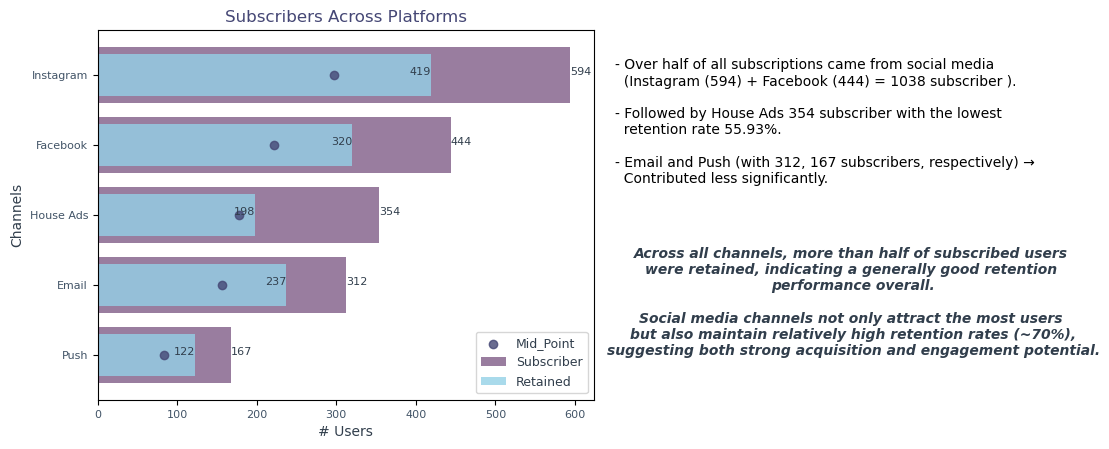

In [326]:
# Visualization - subscribing channeles and retained subscribers
# Data
sub_ch= subscribers.subscribing_channel.to_list()
sub_sub= subscribers.subscribers_num
sub_ret=subscribers.retained_num
mid_point=subscribers.middle_pt

# Creating the chart
size=.6
plt.barh(sub_ch,sub_sub,alpha=.8, color='#805D87', label='Subscriber')
plt.barh(sub_ch,sub_ret,size,alpha=.8, color='#94D1E7',label='Retained')
plt.scatter(mid_point,sub_ch, label='Mid_Point', color = '#454775', alpha=.8)

# Customizing the chart
plt.title('Subscribers Across Platforms',fontsize=12,color = '#454775')

plt.ylabel('Channels', fontsize=10, color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

plt.xlabel('# Users', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating bars with values
for i,v in enumerate(sub_sub): 
    plt.text(v,i,v,fontsize=8, color='#313E4C')

for i,v in enumerate(sub_ret): 
    plt.text(v,i,v,ha='right',fontsize=8, color='#313E4C')

# Findings
text_sub=f''' 
- Over half of all subscriptions came from social media 
  (Instagram ({sub_sub.max()}) + Facebook ({subscribers.iloc[3,1]}) = {sub_sub.max()+subscribers.iloc[3,1]} subscriber ).\n
- Followed by House Ads {subscribers.iloc[2,1]} subscriber with the lowest \n  retention rate {subscribers.retained_pct.min():.2%}.\n 
- Email and Push (with {subscribers.iloc[1,1]}, {subscribers.iloc[0,1]} subscribers, respectively) →\n  Contributed less significantly.\n
'''
text2_sub='''
Across all channels, more than half of subscribed users \nwere retained, indicating a generally good retention \nperformance overall.\n
Social media channels not only attract the most users \nbut also maintain relatively high retention rates (~70%),\nsuggesting both strong acquisition and engagement potential.'''
plt.text(650,2,text_sub)
plt.text(950,0,text2_sub, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

<br>

### $\color{#454775}{\sf Influence\;Factors:}$
### $\color{#454775}{Q1:}$ ***What factors most stringly influence user Conversion and Retention Rates?***
#### *Conversion & Retention Rates*


In [327]:
# 1- Overall Conversion Rate
# Creating converted_users table:
converted_users = marketing.query('converted == True')

# Calculating The Overall Conversion Rate
converted=converted_users.user_id.nunique()
total_users = marketing.user_id.nunique()

conversion_rate = converted/total_users

print(f'\nThe Overall Conversion Rate = {round(conversion_rate*100,2)}%\n')


The Overall Conversion Rate = 13.92%



In [328]:
# 2- Overall Retention Rate (spaning 1 month)
# Creating retained_users table:
retained_users = converted_users.query('is_retained == True')

# Calculating The Overall Retention Rate
retained=retained_users.user_id.nunique()

retention_rate = retained/converted

print(f'\nThe Overall Retention Rate  = {round(retention_rate*100,2)}%\n')


The Overall Retention Rate  = 67.09%



<br> 

#### $\color{#454775}{1-}$ *Marketing Channels:*

In [329]:
# Calculating Conversion Rate across marketing channels
converted_ch=converted_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                             .rename(columns={'subscribing_channel':'channel','user_id':'converted'})

users_ch = marketing.groupby('marketing_channel').user_id.nunique().reset_index()\
                    .rename(columns={'marketing_channel':'channel','user_id':'total_users'})

conversion_ch =users_ch.merge(converted_ch, on ='channel')

conversion_ch['conversion_rate']=conversion_ch['converted']/conversion_ch['total_users']

conversion_ch = conversion_ch.sort_values('conversion_rate', ascending= False)

conversion_ch.style.hide().format({'conversion_rate':'{:,.2%}'})

channel,total_users,converted,conversion_rate
Email,553,187,33.82%
Instagram,1740,232,13.33%
Facebook,1758,221,12.57%
Push,972,77,7.92%
House Ads,3968,298,7.51%


In [330]:
# Calculating Retention Rate across marketing channels
retained_ch=retained_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                          .rename(columns={'subscribing_channel':'channel','user_id':'retained'})

retention_ch = converted_ch.merge(retained_ch, on='channel')

retention_ch['retention_rate']=retention_ch['retained']/retention_ch['converted']

retention_ch=retention_ch.sort_values('retention_rate', ascending=False)

retention_ch.style.hide().format({'retention_rate':'{:,.2%}'})

channel,converted,retained,retention_rate
Email,187,144,77.01%
Push,77,54,70.13%
Facebook,221,152,68.78%
Instagram,232,158,68.10%
House Ads,298,173,58.05%


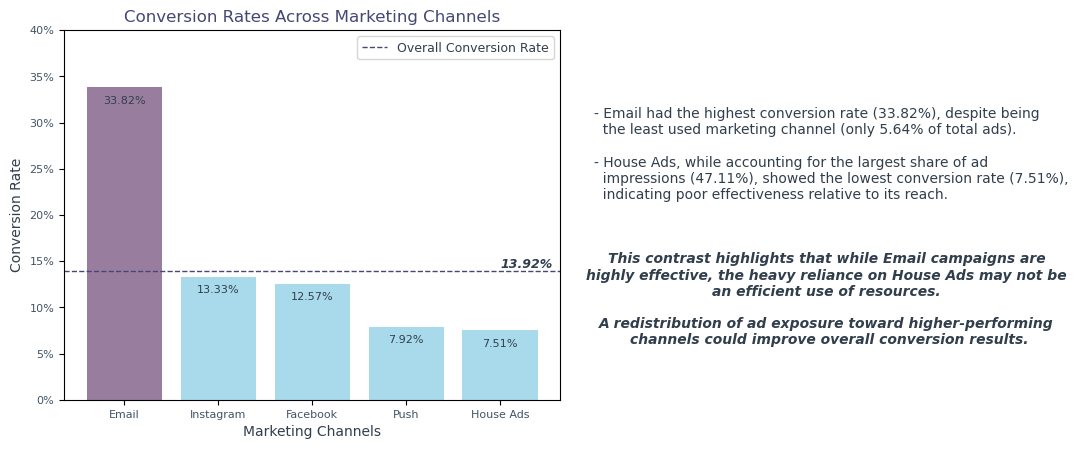

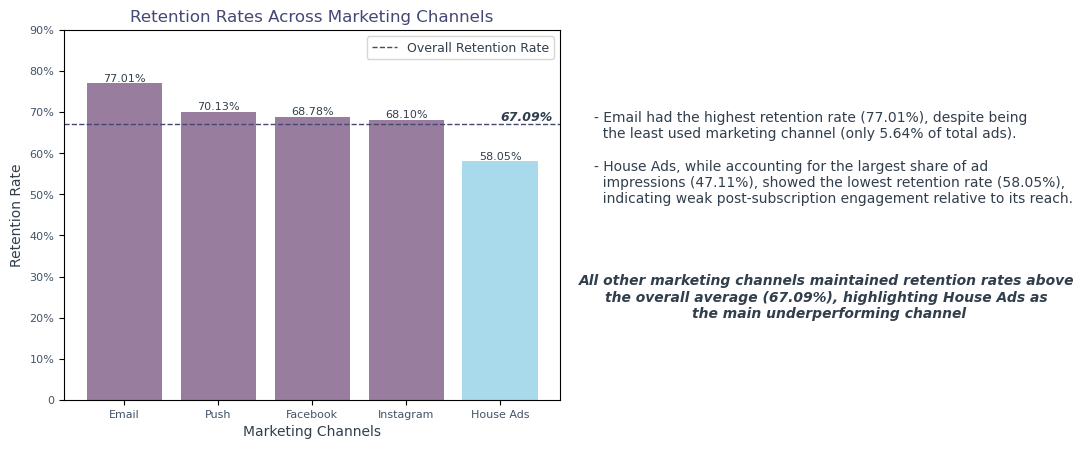

In [331]:
# 1- Visualization - Conversion Rates Across Marketing Channels: 
# Data
conv_ch= conversion_ch.channel.to_list()
conv_ch_rate= conversion_ch.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in conv_ch_rate] 

# Creating the chart
plt.bar(conv_ch,conv_ch_rate, color=colors, alpha=.8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Marketing Channels', fontsize=12,color='#454775')

plt.xlabel('Marketing Channels', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8,color='#415366')

plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.45,.05),[f'{y:.0%}' for y in np.arange(0,.45,.05)], fontsize=8,color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C')

# Annotating chart with values
plt.text(4,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom',color='#313E4C', fontsize=9,fontstyle='italic',weight='semibold')

for i,v in enumerate(conv_ch_rate):
    plt.text(i,v-.02,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text_conv_ch=f'''
- Email had the highest conversion rate ({conv_ch_rate.max():.2%}), despite being \n  the least used marketing channel (only {ch_users.pct.min():.2%} of total ads).\n
- House Ads, while accounting for the largest share of ad \n  impressions ({ch_users.pct.max():.2%}), showed the lowest conversion rate ({conv_ch_rate.min():.2%}), 
  indicating poor effectiveness relative to its reach.\n'''
text2_conv_ch='''
This contrast highlights that while Email campaigns are \nhighly effective, the heavy reliance on House Ads may not be \nan efficient use of resources. \n
A redistribution of ad exposure toward higher-performing \nchannels could improve overall conversion results.'''
plt.text(5,.2,text_conv_ch, color='#313E4C')
plt.text(7.5,.06,text2_conv_ch, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();


# 2- Visualization - Retention Rates Across Marketing Channels: 
# Data
ret_ch= retention_ch.channel.to_list()
ret_ch_rate= retention_ch.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_ch_rate] 

# Creating the chart
plt.bar(ret_ch,ret_ch_rate, color=colors, alpha=.8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Retention Rate', alpha=1)

# Customizing the chart
plt.title('Retention Rates Across Marketing Channels', fontsize=12, color='#454775')
plt.xlabel('Marketing Channels', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8,color='#415366')
plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,1,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%','90%'], fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C')

# Annotating chart with values
plt.text(4,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom',color='#313E4C', fontsize=9,fontstyle='italic',weight='semibold')
for i,v in enumerate(ret_ch_rate):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text_ret_ch=f'''
- Email had the highest retention rate ({ret_ch_rate.max():.2%}), despite being \n  the least used marketing channel (only {ch_users.pct.min():.2%} of total ads).\n
- House Ads, while accounting for the largest share of ad \n  impressions ({ch_users.pct.max():.2%}), showed the lowest retention rate ({ret_ch_rate.min():.2%}), 
  indicating weak post-subscription engagement relative to its reach.\n
'''
text2_ret_ch=f'''
All other marketing channels maintained retention rates above \nthe overall average ({retention_rate:.2%}), highlighting House Ads as 
the main underperforming channel'''
plt.text(5,.4,text_ret_ch, color='#313E4C')
plt.text(7.5,.2,text2_ret_ch, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

In [332]:
# Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
performance_ch=conversion_ch.merge(retention_ch,on='channel')\
                            .loc[:,['channel','conversion_rate','retention_rate']]

performance_ch.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

channel,conversion_rate,retention_rate
Email,33.82%,77.01%
Instagram,13.33%,68.10%
Facebook,12.57%,68.78%
Push,7.92%,70.13%
House Ads,7.51%,58.05%


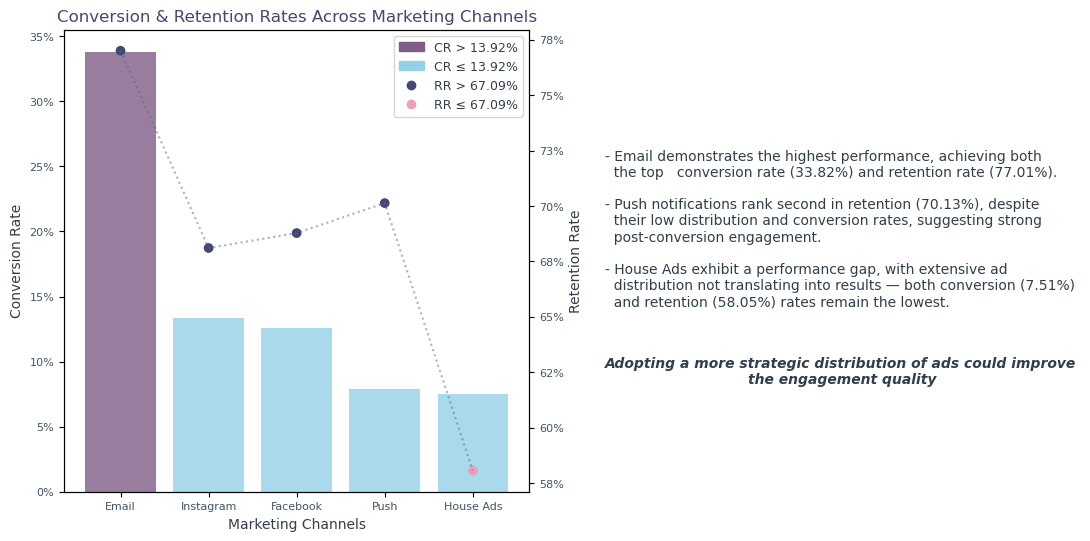

In [333]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
# Data
perform_ch=performance_ch.channel.to_list()
perform_ch_con=performance_ch.conversion_rate
perform_ch_ret=performance_ch.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_ch_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_ch_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6, 6))

# 1- Conversion Rate (Bar)
ax1.bar(perform_ch,perform_ch_con, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_ch,perform_ch_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_ch,perform_ch_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels', fontsize=12, color='#454775')

ax1.set_xlabel('Marketing Channels', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')

# Findings
text_perform_ch=f'''
- Email demonstrates the highest performance, achieving both \n  the top   conversion rate ({perform_ch_con.max():.2%}) and retention rate ({perform_ch_ret.max():.2%}).\n
- Push notifications rank second in retention ({perform_ch_ret[3]:.2%}), despite \n  their low distribution and conversion rates, suggesting strong 
  post-conversion engagement.\n
- House Ads exhibit a performance gap, with extensive ad \n  distribution not translating into results — both conversion ({perform_ch_con.min():.2%})
  and retention ({perform_ch_ret.min():.2%}) rates remain the lowest.'''
text2_perform_ch='''
Adopting a more strategic distribution of ads could improve \nthe engagement quality'''
plt.text(5.5,.655,text_perform_ch, color='#313E4C')
plt.text(8.2,.62,text2_perform_ch, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{2-}$ *Variant Classification:*

In [334]:
# Calculating Conversion Rate across variant classifications
converted_var=converted_users.groupby('variant').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_var = marketing.groupby('variant').user_id.nunique().reset_index()\
                     .rename(columns={'user_id':'total_users'})

conversion_var =users_var.merge(converted_var, on ='variant')

conversion_var['conversion_rate']=conversion_var['converted']/conversion_var['total_users']

conversion_var = conversion_var.sort_values('conversion_rate', ascending= False)

conversion_var.style.hide().format({'conversion_rate':'{:,.2%}'})

variant,total_users,converted,conversion_rate
personalization,4089,687,16.80%
control,3704,344,9.29%


In [335]:
# Calculating Retention Rate witnin Variant Classifications
retained_var=retained_users.groupby('variant').user_id.nunique().reset_index()\
                           .rename(columns={'user_id':'retained'})

retention_var = converted_var.merge(retained_var, on='variant')

retention_var['retention_rate']=retention_var['retained']/retention_var['converted']

retention_var=retention_var.sort_values('retention_rate', ascending=False)

retention_var.style.hide().format({'retention_rate':'{:,.2%}'})

variant,converted,retained,retention_rate
control,344,242,70.35%
personalization,687,455,66.23%


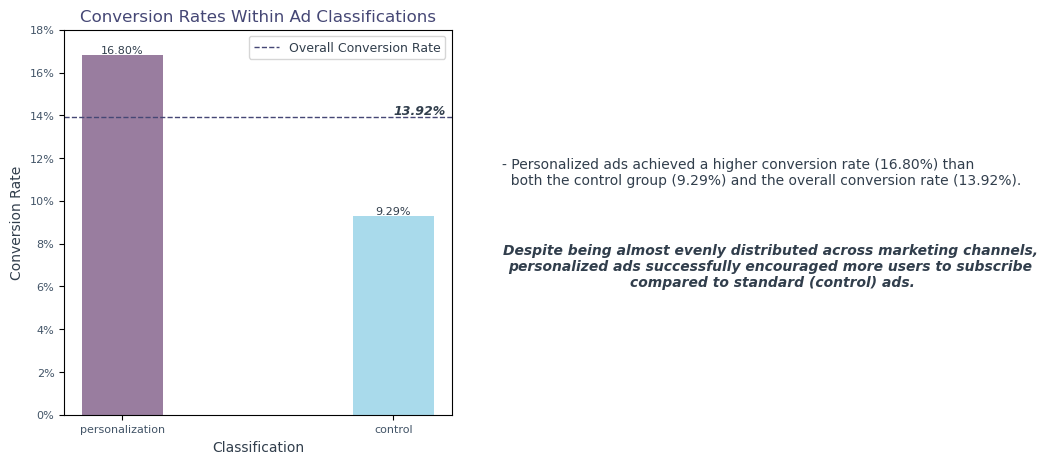

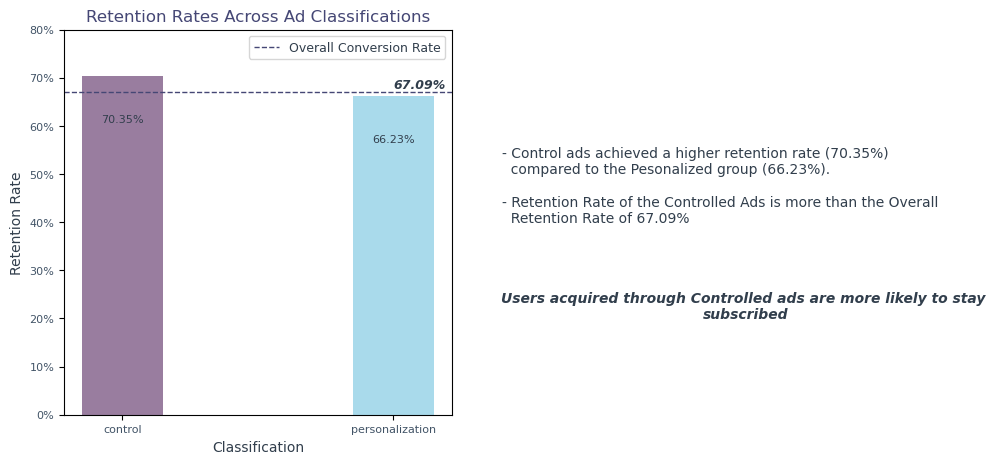

In [336]:
# 1- Visualization - Conversion Rates Within Variant Classifications: 
# Data
con_var= conversion_var.variant.to_list()
con_var_rate= conversion_var.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_var_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(con_var,con_var_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Within Ad Classifications', fontsize=12,color='#454775')

plt.xlabel('Classification', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.2,.02),[f'{y:.0%}' for y in np.arange(0,.2,.02)], fontsize=8,color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(con_var_rate):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_con_var=f'''
- Personalized ads achieved a higher conversion rate ({con_var_rate.max():.2%}) than 
  both the control group ({con_var_rate.min():.2%}) and the overall conversion rate ({conversion_rate:.2%}).\n'''

text2_con_var='''
Despite being almost evenly distributed across marketing channels, \npersonalized ads successfully encouraged more users to subscribe 
compared to standard (control) ads.'''

plt.text(1.4,.1,text_con_var,color='#313E4C')
plt.text(2.4,.06,text2_con_var, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()

# 2-Visualization - Retention Rates Across Variant Classifications: 
# Data
ret_var= retention_var.variant.to_list()
ret_var_rate= retention_var.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_var_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(ret_var,ret_var_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Retention Rates Across Ad Classifications', fontsize=12,color='#454775')

plt.xlabel('Classification', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),[f'{y:.0%}' for y in np.arange(0,.9,.1)], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_var_rate):
    plt.text(i,v-.1,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_ret_var=f'''
- Control ads achieved a higher retention rate ({ret_var_rate.max():.2%})\n  compared to the Pesonalized group ({ret_var_rate.min():.2%}).\n
- Retention Rate of the Controlled Ads is more than the Overall \n  Retention Rate of {retention_rate:.2%}'''

text2_ret_var='''
Users acquired through Controlled ads are more likely to stay \nsubscribed'''

plt.text(1.4,.4,text_ret_var,color='#313E4C')
plt.text(2.3,.2,text2_ret_var, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show();

In [337]:
# Comparing Conversion Rates with Retention Rates Within Variant Classification: 
performance_var=conversion_var.merge(retention_var,on='variant')\
                            .loc[:,['variant','conversion_rate','retention_rate']]

performance_var.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

variant,conversion_rate,retention_rate
personalization,16.80%,66.23%
control,9.29%,70.35%


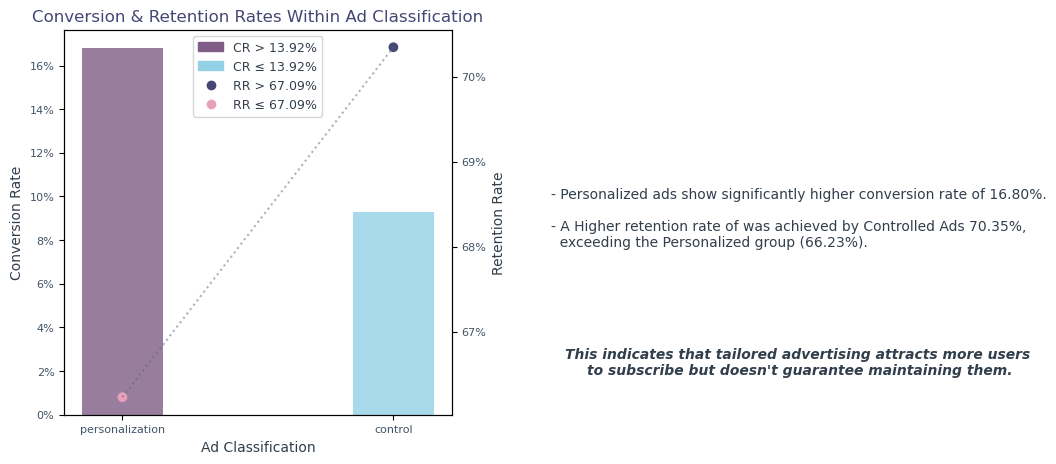

In [338]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Variant Classification: 
# Data
perform_var=performance_var.variant.to_list()
perform_var_con=performance_var.conversion_rate
perform_var_ret=performance_var.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_var_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_var_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_var,perform_var_con,width=.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_var,perform_var_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_var,perform_var_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Within Ad Classification', fontsize=12, color='#454775')

ax1.set_xlabel('Ad Classification', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='upper center')

# Findings
text_perform_var=f'''
- Personalized ads show significantly higher conversion rate of {perform_var_con.max():.2%}.\n 
- A Higher retention rate of was achieved by Controlled Ads {perform_var_ret.max():.2%}, \n  exceeding the Personalized group ({perform_var_ret.min():.2%}).'''

text2_perform_var='''
This indicates that tailored advertising attracts more users \nto subscribe but doesn't guarantee maintaining them.'''

plt.text(1.58,.68,text_perform_var, color='#313E4C')
plt.text(2.5,.665,text2_perform_var, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{3-}$ *Displayed Language:*

In [339]:
# Calculating Conversion Rate across Displayed Languages
converted_displayed_lang=converted_users.groupby('language_displayed').user_id.nunique().reset_index()\
                                        .rename(columns={'language_displayed':'language','user_id':'converted'})

users_displayed_lang = marketing.groupby('language_displayed').user_id.nunique().reset_index()\
                                .rename(columns={'language_displayed':'language','user_id':'total_users'})

conversion_displayed_lang =users_displayed_lang.merge(converted_displayed_lang, on ='language')

conversion_displayed_lang['conversion_rate']=conversion_displayed_lang['converted']/conversion_displayed_lang['total_users']

conversion_displayed_lang=conversion_displayed_lang.sort_values('conversion_rate',ascending=False)

conversion_displayed_lang.style.hide().format({'conversion_rate':'{:,.2%}'})

language,total_users,converted,conversion_rate
German,74,53,71.62%
Arabic,24,12,50.00%
Spanish,120,24,20.00%
English,7154,926,12.94%


In [340]:
# Calculating Retention Rate across Displayed Languages
retained_displayed_lang=retained_users.groupby('language_displayed').user_id.nunique().reset_index()\
                                      .rename(columns={'language_displayed':'language','user_id':'retained'})

retention_displayed_lang = converted_displayed_lang.merge(retained_displayed_lang, on='language')

retention_displayed_lang['retention_rate']=retention_displayed_lang['retained']/retention_displayed_lang['converted']

retention_displayed_lang=retention_displayed_lang.sort_values('retention_rate', ascending=False)

retention_displayed_lang.style.hide().format({'retention_rate':'{:,.2%}'})

language,converted,retained,retention_rate
English,926,623,67.28%
Spanish,24,16,66.67%
German,53,35,66.04%
Arabic,12,7,58.33%


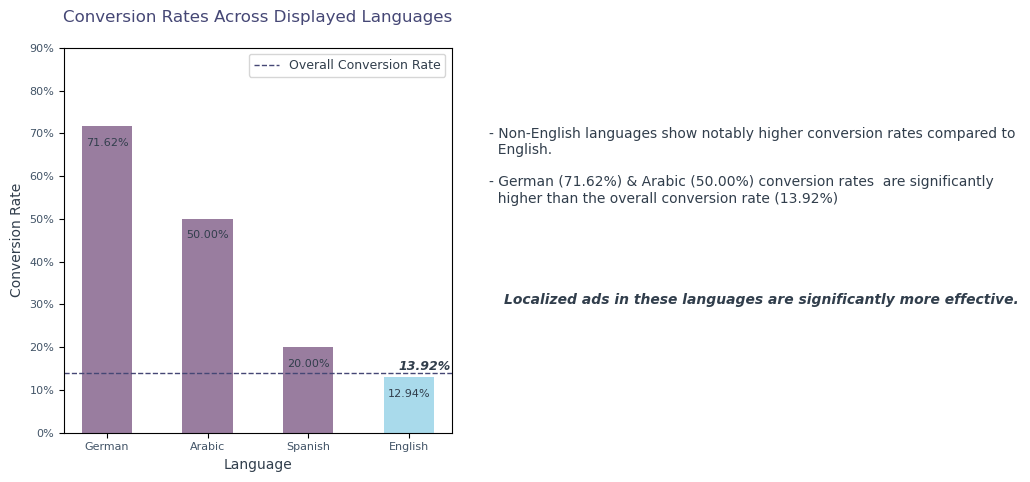

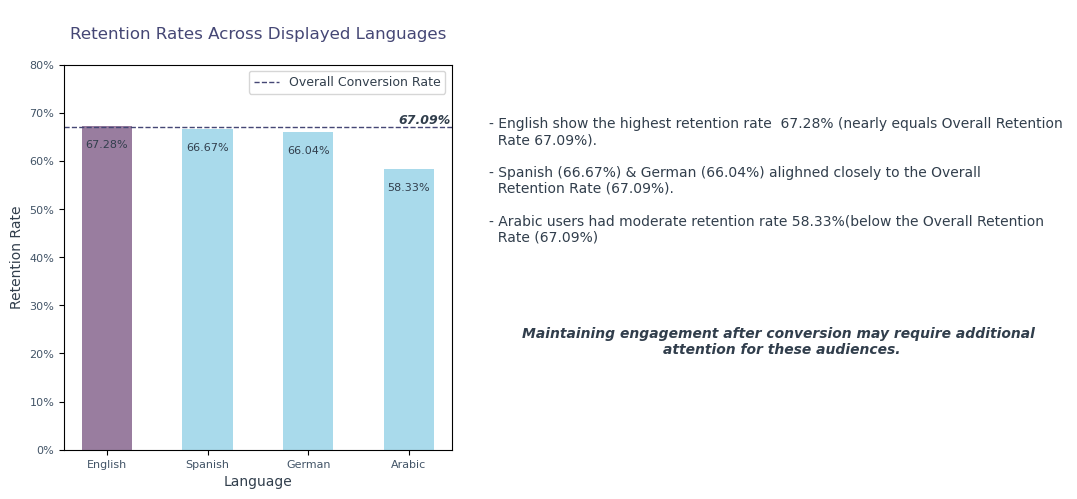

In [341]:
# 1- Visualization - Conversion Rates Across Displayed Languages: 
# Data
con_dlang= conversion_displayed_lang.language.to_list()
con_dlang_rate= conversion_displayed_lang.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_dlang_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(con_dlang,con_dlang_rate,.5, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Displayed Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10,color='#313E4C')
plt.yticks(np.arange(0,1,.1),[f'{y:.0%}' for y in np.arange(0,1,.1)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(2.9,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(sorted(con_dlang_rate,reverse=True)):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text_con_dlang=f'''
- Non-English languages show notably higher conversion rates compared to \n  English.\n
- German ({conversion_displayed_lang.iloc[0,3]:.2%}) & Arabic ({conversion_displayed_lang.iloc[1,3]:.2%}) conversion rates  are significantly 
  higher than the overall conversion rate ({conversion_rate:.2%})
'''
text2_con_dlang='''
Localized ads in these languages are significantly more effective.'''

plt.text(3.8,.5,text_con_dlang,color='#313E4C')
plt.text(6.5,.3,text2_con_dlang, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()


# 2- Visualization - Retention Rates Across Displayed Languages: 
# Data
ret_dlang= retention_displayed_lang.language.to_list()
ret_dlang_rate= retention_displayed_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_dlang_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(ret_dlang,ret_dlang_rate,.5, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates Across Displayed Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),[f'{y:.0%}' for y in np.arange(0,.9,.1)],fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(2.9,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_dlang_rate):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_ret_dlang=f'''
- English show the highest retention rate  {ret_dlang_rate.max():.2%} (nearly equals Overall Retention \n  Rate {retention_rate:.2%}).\n
- Spanish ({retention_displayed_lang.iloc[1,3]:.2%}) & German ({retention_displayed_lang.iloc[2,3]:.2%}) alighned closely to the Overall \n  Retention Rate ({retention_rate:.2%}).\n 
- Arabic users had moderate retention rate {retention_displayed_lang.iloc[3,3]:.2%}(below the Overall Retention \n  Rate ({retention_rate:.2%}) 
 '''
text2_ret_dlang='''
Maintaining engagement after conversion may require additional \nattention for these audiences.'''

plt.text(3.8,.4,text_ret_dlang,color='#313E4C')
plt.text(6.7,.2,text2_ret_dlang, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()

In [342]:
# Comparing Conversion Rates with Retention Rates Across Displayed Languages: 
performance_displayed_lang=conversion_displayed_lang.merge(retention_displayed_lang,on='language')\
                                                    .loc[:,['language','conversion_rate','retention_rate']]

performance_displayed_lang.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

language,conversion_rate,retention_rate
German,71.62%,66.04%
Arabic,50.00%,58.33%
Spanish,20.00%,66.67%
English,12.94%,67.28%


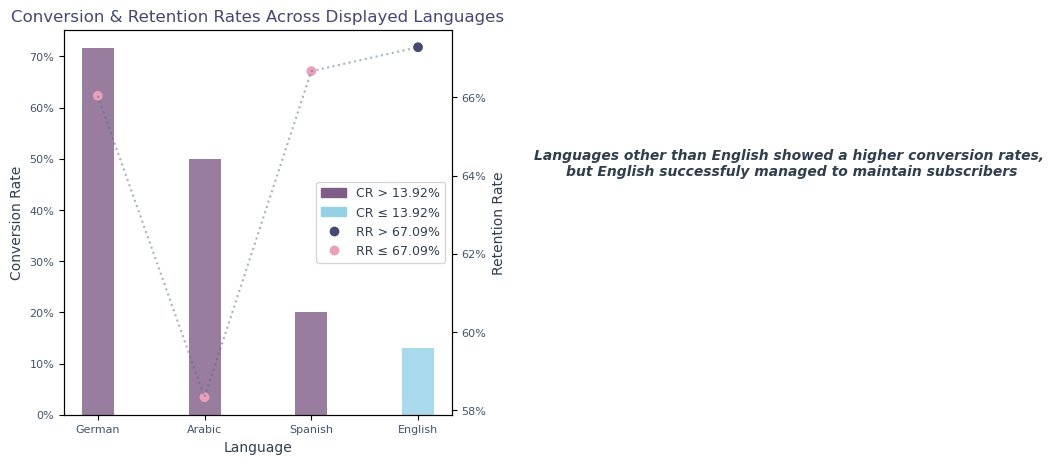

In [343]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Displayed Languages:
# Data
perform_dlang=performance_displayed_lang.language.to_list()
perform_dlang_con=performance_displayed_lang.conversion_rate
perform_dlang_ret=performance_displayed_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_dlang_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_dlang_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_dlang,perform_dlang_con,width=.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_dlang,perform_dlang_ret, ls='dotted', color='#51687F', alpha=.5)
ax2.scatter(perform_dlang,perform_dlang_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Displayed Languages', fontsize=12, color='#454775')

ax1.set_xlabel('Language', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='center right')

# Findings
text_perform_dlang='''
Languages other than English showed a higher conversion rates, \nbut English successfuly managed to maintain subscribers'''
plt.text(6.5,.64,text_perform_dlang, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

#### $\color{#454775}{4-}$ *Matched Language:*

In [344]:
# Calculating Conversion Rate across Matched Languages
converted_lang=converted_users.groupby('matched_lang').user_id.nunique().reset_index()\
                              .rename(columns={'matched_lang':'language_status','user_id':'converted'})

users_lang = marketing.groupby('matched_lang').user_id.nunique().reset_index()\
                      .rename(columns={'matched_lang':'language_status','user_id':'total_users'})

conversion_lang =users_lang.merge(converted_lang, on ='language_status')

conversion_lang['conversion_rate']=conversion_lang['converted']/conversion_lang['total_users']

conversion_lang['language_status']=np.where(conversion_lang['language_status']==True,'Matched','Not_Matched')

conversion_lang=conversion_lang.sort_values('conversion_rate',ascending=False)

conversion_lang.style.hide().format({'conversion_rate':'{:,.2%}'})

language_status,total_users,converted,conversion_rate
Matched,6975,988,14.16%
Not_Matched,403,27,6.70%


In [345]:
# Calculating Retention Rate across Matched & Not-Matched Languages
retained_lang=retained_users.groupby('matched_lang').user_id.nunique().reset_index()\
                            .rename(columns={'matched_lang':'language_status','user_id':'retained'})

retention_lang = converted_lang.merge(retained_lang, on='language_status')

retention_lang['retention_rate']=retention_lang['retained']/retention_lang['converted']

retention_lang['language_status']=np.where(retention_lang['language_status']==True,'Matched','Not_Matched')

retention_lang=retention_lang.sort_values('retention_rate', ascending=False)

retention_lang.style.hide().format({'retention_rate':'{:,.2%}'})

language_status,converted,retained,retention_rate
Matched,988,667,67.51%
Not_Matched,27,14,51.85%


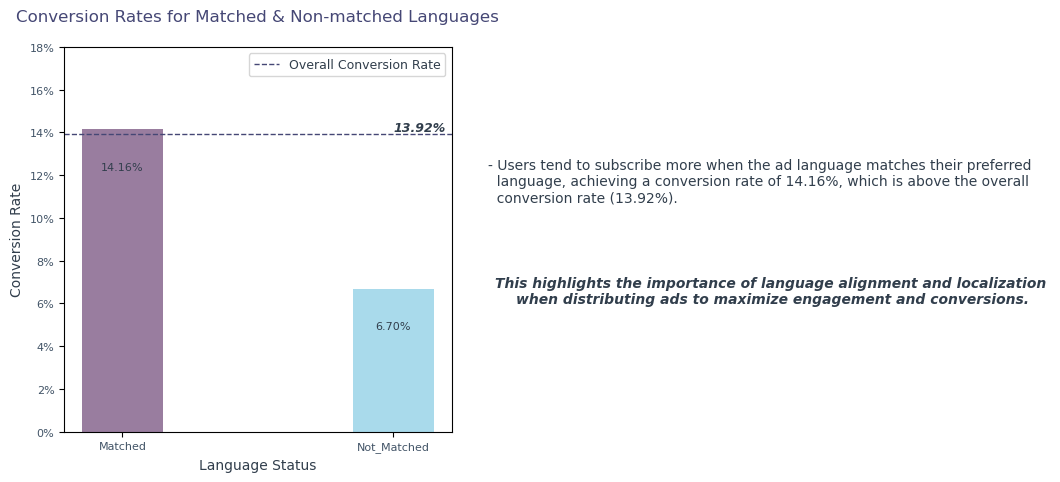

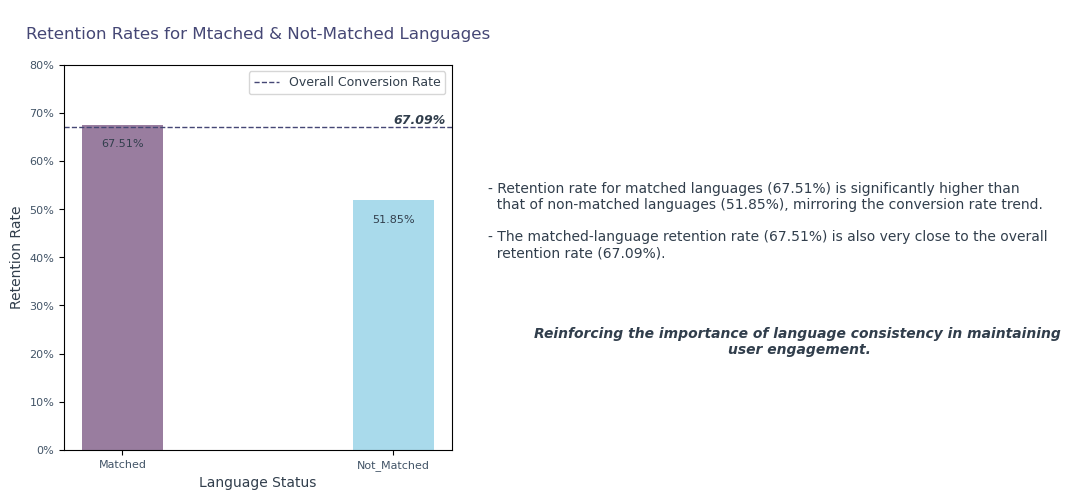

In [346]:
# 1- Visualization - Conversion Rates for Matched & Non-matched Languages: 
# Data
con_lstatus= conversion_lang.language_status.to_list()
con_lstatus_rate= conversion_lang.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_lstatus_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(con_lstatus,con_lstatus_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates for Matched & Non-matched Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language Status', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10,color='#313E4C')
plt.yticks(np.arange(0,.2,.02),[f'{y:.0%}' for y in np.arange(0,.2,.02)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(sorted(con_lstatus_rate,reverse=True)):
    plt.text(i,v-.02,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text_con_lstatus=f'''
- Users tend to subscribe more when the ad language matches their preferred 
  language, achieving a conversion rate of {con_lstatus_rate.max():.2%}, which is above the overall \n  conversion rate ({conversion_rate:.2%}).\n'''

text2_con_lstatus='''
This highlights the importance of language alignment and localization \nwhen distributing ads to maximize engagement and conversions.'''

plt.text(1.35,.1,text_con_lstatus,color='#313E4C')
plt.text(2.4,.06,text2_con_lstatus, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()


# 2- Visualization - Retention Rates for Mtached & Not-Matched Languages: 
# Data
ret_lstatus= retention_lang.language_status.to_list()
ret_lstatus_rate= retention_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_lstatus_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(ret_lstatus,ret_lstatus_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates for Mtached & Not-Matched Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language Status', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),[f'{y:.0%}' for y in np.arange(0,.9,.1)],fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_lstatus_rate):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_ret_lstatus=f'''
- Retention rate for matched languages ({ret_lstatus_rate.max():.2%}) is significantly higher than
  that of non-matched languages ({ret_lstatus_rate.min():.2%}), mirroring the conversion rate trend.\n
- The matched-language retention rate ({ret_lstatus_rate.max():.2%}) is also very close to the overall 
  retention rate ({retention_rate:.2%}).'''

text2_ret_lstatus='''
Reinforcing the importance of language consistency in maintaining \nuser engagement.'''

plt.text(1.35,.4,text_ret_lstatus,color='#313E4C')
plt.text(2.5,.2,text2_ret_lstatus, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()

In [347]:
# Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages: 
performance_lang=conversion_lang.merge(retention_lang,on='language_status')\
                                .loc[:,['language_status','conversion_rate','retention_rate']]

performance_lang.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

language_status,conversion_rate,retention_rate
Matched,14.16%,67.51%
Not_Matched,6.70%,51.85%


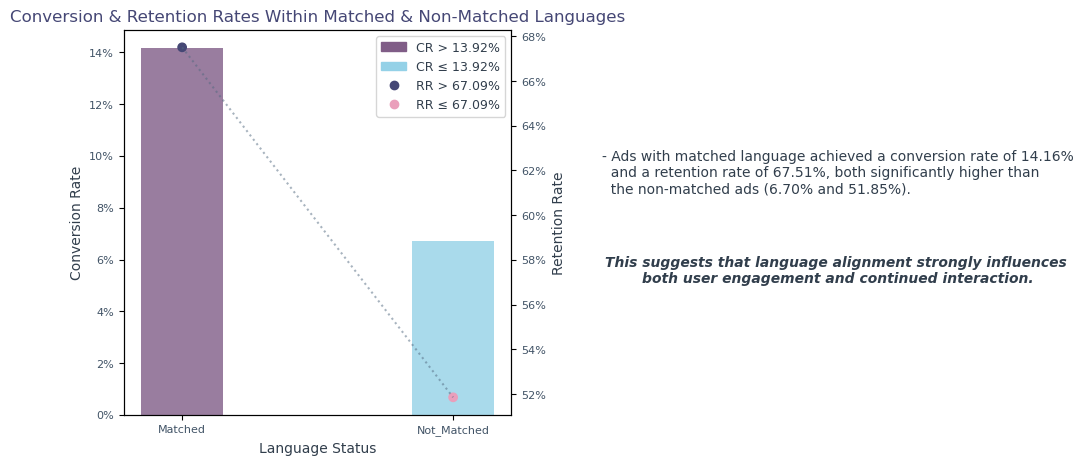

In [348]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages:
# Data
perform_lstatus=performance_lang.language_status.to_list()
perform_lstatus_con=performance_lang.conversion_rate
perform_lstatus_ret=performance_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_lstatus_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_lstatus_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_lstatus,perform_lstatus_con,width=.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_lstatus,perform_lstatus_ret, ls='dotted', color='#51687F', alpha=.5)
ax2.scatter(perform_lstatus,perform_lstatus_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Within Matched & Non-Matched Languages', fontsize=12, color='#454775')

ax1.set_xlabel('Language Status', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')

# Findings
text_perform_lstatus=f'''
- Ads with matched language achieved a conversion rate of {perform_lstatus_con.max():.2%} 
  and a retention rate of {perform_lstatus_ret.max():.2%}, both significantly higher than 
  the non-matched ads ({perform_lstatus_con.min():.2%} and {perform_lstatus_ret.min():.2%}).'''

text2_perform_lstatus='''
This suggests that language alignment strongly influences \nboth user engagement and continued interaction.'''

plt.text(1.55,.61,text_perform_lstatus, color='#313E4C')
plt.text(2.42,.57,text2_perform_lstatus, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{5-}$ *Age Groups:*

In [349]:
# Calculating Conversion Rate within Age Groups:
converted_age=converted_users.groupby('age_group').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_age = marketing.groupby('age_group').user_id.nunique().reset_index()\
                     .rename(columns={'user_id':'total_users'})

conversion_age =users_age.merge(converted_age, on ='age_group')

conversion_age['conversion_rate']=conversion_age['converted']/conversion_age['total_users']


conversion_age.style.hide().format({'conversion_rate':'{:,.2%}'})

age_group,total_users,converted,conversion_rate
0-18 years,1206,192,15.92%
19-24 years,1304,303,23.24%
24-30 years,1218,228,18.72%
30-36 years,1057,77,7.28%
36-45 years,1056,74,7.01%
45-55 years,1056,75,7.10%
55+ years,979,76,7.76%


In [350]:
# Calculating Retention Rate within Age Groups:
retained_age=retained_users.groupby('age_group').user_id.nunique().reset_index()\
                           .rename(columns={'user_id':'retained'})

retention_age = converted_age.merge(retained_age, on='age_group')

retention_age['retention_rate']=retention_age['retained']/retention_age['converted']

retention_age.style.hide().format({'retention_rate':'{:,.2%}'})

age_group,converted,retained,retention_rate
0-18 years,192,128,66.67%
19-24 years,303,213,70.30%
24-30 years,228,153,67.11%
30-36 years,77,53,68.83%
36-45 years,74,46,62.16%
45-55 years,75,47,62.67%
55+ years,76,51,67.11%


In [351]:
l=[1,2,3,4,5]
np.mean(l[0:3])

2.0

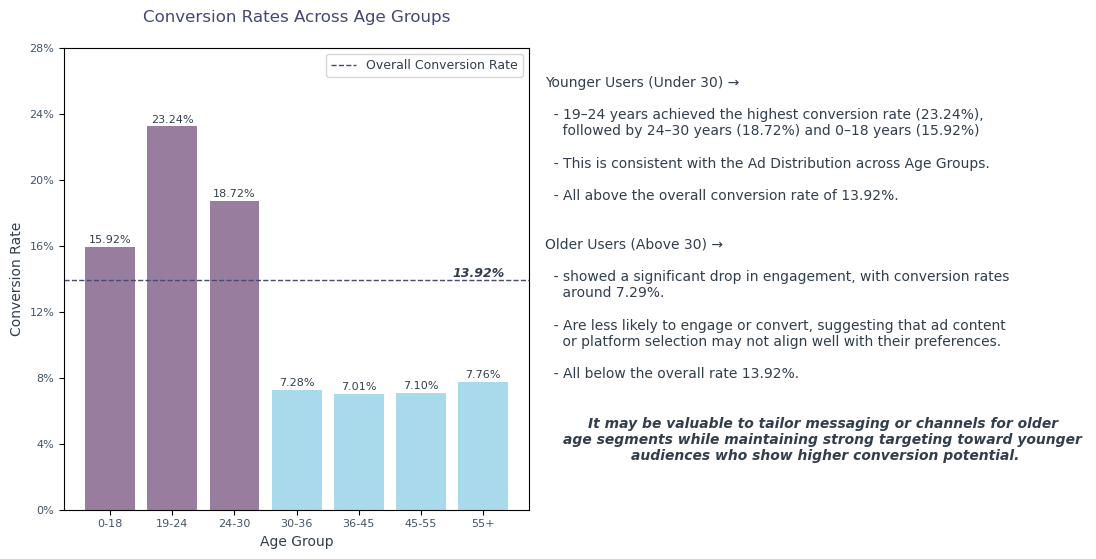

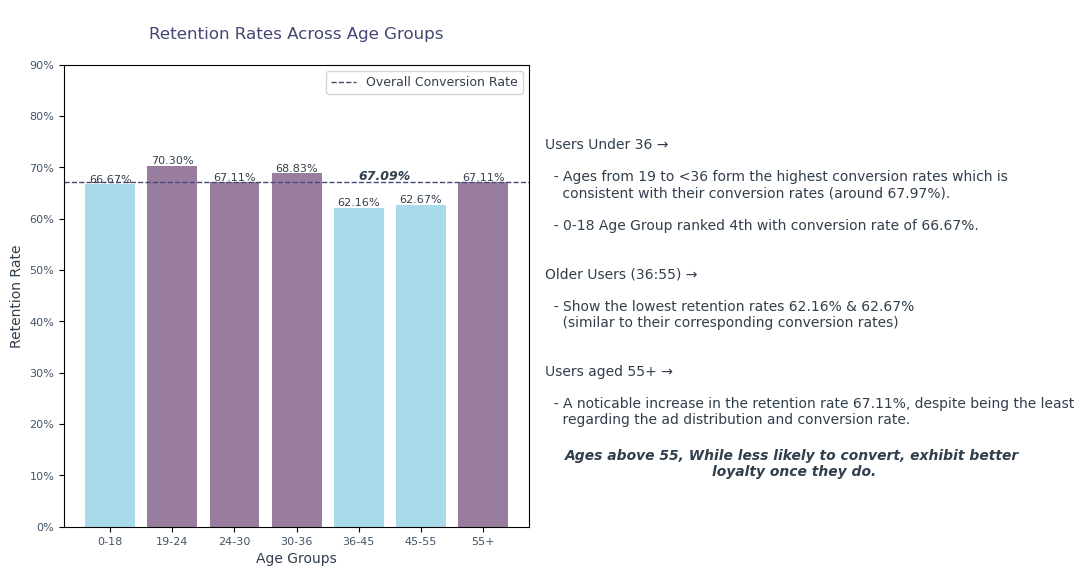

In [352]:
# 1- Visualization - Conversion Rates Across Age Groups: 
# Data
con_age= [a.replace(' years', '') for a in conversion_age.age_group.to_list()]
con_age_rate= conversion_age.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_age_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.bar(con_age,con_age_rate, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Age Groups\n', fontsize=12, color='#454775')

plt.xlabel('Age Group', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.32,.04),[f'{y:.0%}' for y in np.arange(0,.32,.04)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(5.5,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(con_age_rate):
    plt.text(i,v+.001,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_con_age=f'''
Younger Users (Under 30) → \n
  - 19–24 years achieved the highest conversion rate ({con_age_rate.max():.2%}), 
    followed by 24–30 years ({sorted(con_age_rate.to_list(), reverse=True)[1]:.2%}) and 0–18 years ({sorted(con_age_rate.to_list(), reverse=True)[2]:.2%})\n
  - This is consistent with the Ad Distribution across Age Groups.\n 
  - All above the overall conversion rate of {conversion_rate:.2%}.\n\n
Older Users (Above 30) → \n
  - showed a significant drop in engagement, with conversion rates \n    around {np.mean(sorted(con_age_rate.to_list())[0:4]):.2%}. \n
  - Are less likely to engage or convert, suggesting that ad content \n    or platform selection may not align well with their preferences.\n
  - All below the overall rate {conversion_rate:.2%}.\n\n'''

text2_con_age='''
It may be valuable to tailor messaging or channels for older \nage segments while maintaining strong targeting toward younger 
audiences who show higher conversion potential.'''

plt.text(7,.06,text_con_age, color='#313E4C')
plt.text(11.5,0.03,text2_con_age, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2- Visualization - Retention Rates Across Age Groups: 
# Data
ret_age= [a.replace(' years','') for a in retention_age.age_group.to_list()]
ret_age_rate= retention_age.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_age_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.bar(ret_age,ret_age_rate, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates Across Age Groups\n', fontsize=12, color='#454775')

plt.xlabel('Age Groups', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,1,.1),[f'{y:.0%}' for y in np.arange(0,1,.1)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(4,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_age_rate):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text3=f'''
Users Under 36 →\n
  - Ages from 19 to <36 form the highest conversion rates which is 
    consistent with their conversion rates (around {np.mean(sorted(ret_age_rate.to_list(),reverse=True)[1:3]):.2%}).\n
  - 0-18 Age Group ranked 4th with conversion rate of {ret_age_rate.to_list()[0]:.2%}.\n\n
Older Users (36:55) →\n
  - Show the lowest retention rates {ret_age_rate.to_list()[4]:.2%} & {ret_age_rate.to_list()[5]:.2%}
    (similar to their corresponding conversion rates)\n\n
Users aged 55+ → \n
  - A noticable increase in the retention rate {ret_age_rate.to_list()[6]:.2%}, despite being the least 
    regarding the ad distribution and conversion rate.'''
text4='''
Ages above 55, While less likely to convert, exhibit better 
loyalty once they do.'''
plt.text(7,.2,text3, color='#313E4C')
plt.text(11,.1,text4, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [353]:
# Comparing Conversion Rates with Retention Rates within Age Groups:
performance_age=conversion_age.merge(retention_age,on='age_group')\
                              .loc[:,['age_group','conversion_rate','retention_rate']]

performance_age.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

age_group,conversion_rate,retention_rate
0-18 years,15.92%,66.67%
19-24 years,23.24%,70.30%
24-30 years,18.72%,67.11%
30-36 years,7.28%,68.83%
36-45 years,7.01%,62.16%
45-55 years,7.10%,62.67%
55+ years,7.76%,67.11%


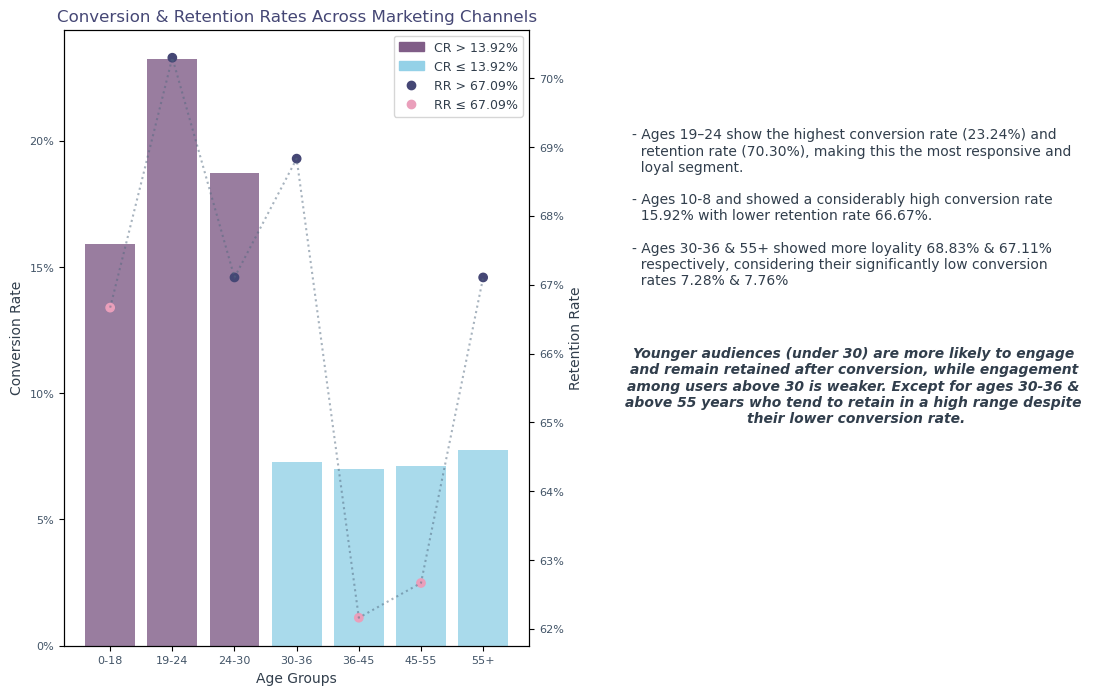

In [354]:
# Visualization - Comparing Conversion Rates with Retention Rates within Age Groups:
# Data
perform_age=[a.replace(' years','') for a in performance_age.age_group.to_list()]
perform_age_con=performance_age.conversion_rate
perform_age_ret=performance_age.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_age_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_age_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6,8))

# 1- Conversion Rate (Bar)
ax1.bar(perform_age,perform_age_con, alpha=.8, color=colors, label='Conversion Rate')

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_age,perform_age_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_age,perform_age_ret,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels', fontsize=12, color='#454775')

ax1.set_xlabel('Age Groups', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='upper right')

# Findings
text_perform_age=f'''
- Ages 19–24 show the highest conversion rate ({perform_age_con.max():.2%}) and 
  retention rate ({perform_age_ret.max():.2%}), making this the most responsive and 
  loyal segment.\n
- Ages 10-8 and showed a considerably high conversion rate 
  {perform_age_con.to_list()[0]:.2%} with lower retention rate {perform_age_ret.to_list()[0]:.2%}.\n
- Ages 30-36 & 55+ showed more loyality {perform_age_ret.to_list()[3]:.2%} & {perform_age_ret.to_list()[6]:.2%} 
  respectively, considering their significantly low conversion 
  rates {perform_age_con.to_list()[3]:.2%} & {perform_age_con.to_list()[6]:.2%}'''

text2_perform_age='''
Younger audiences (under 30) are more likely to engage 
and remain retained after conversion, while engagement 
among users above 30 is weaker. Except for ages 30-36 & 
above 55 years who tend to retain in a high range despite 
their lower conversion rate.'''

plt.text(8.4,.67,text_perform_age, color='#313E4C')
plt.text(12,.65,text2_perform_age, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{6-}$ *Date Served:*

In [355]:
# Calculating Conversion Rate Within Served Dates
converted_date=converted_users.groupby('date_served').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_date = marketing.groupby('date_served').user_id.nunique().reset_index()\
                    .rename(columns={'user_id':'total_users'})

conversion_date =users_date.merge(converted_date, on ='date_served')

conversion_date['date_served']=conversion_date['date_served'].dt.date 

conversion_date['conversion_rate']=conversion_date['converted']/conversion_date['total_users']

conversion_date.style.hide().format({'conversion_rate':'{:,.2%}'})

date_served,total_users,converted,conversion_rate
2018-01-01,362,36,9.94%
2018-01-02,374,37,9.89%
2018-01-03,348,36,10.34%
2018-01-04,323,35,10.84%
2018-01-05,319,40,12.54%
2018-01-06,308,35,11.36%
2018-01-07,275,39,14.18%
2018-01-08,312,36,11.54%
2018-01-09,312,39,12.50%
2018-01-10,337,40,11.87%


In [356]:
# Calculating Retention Rate Within Served Dates
retained_date=retained_users.groupby('date_served').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'retained'})

retention_date = converted_date.merge(retained_date, on='date_served')

retention_date['date_served']=retention_date['date_served'].dt.date 

retention_date['retention_rate']=retention_date['retained']/retention_date['converted']

retention_date.style.hide().format({'retention_rate':'{:,.2%}'})

date_served,converted,retained,retention_rate
2018-01-01,36,28,77.78%
2018-01-02,37,27,72.97%
2018-01-03,36,27,75.00%
2018-01-04,35,18,51.43%
2018-01-05,40,24,60.00%
2018-01-06,35,28,80.00%
2018-01-07,39,23,58.97%
2018-01-08,36,24,66.67%
2018-01-09,39,26,66.67%
2018-01-10,40,27,67.50%


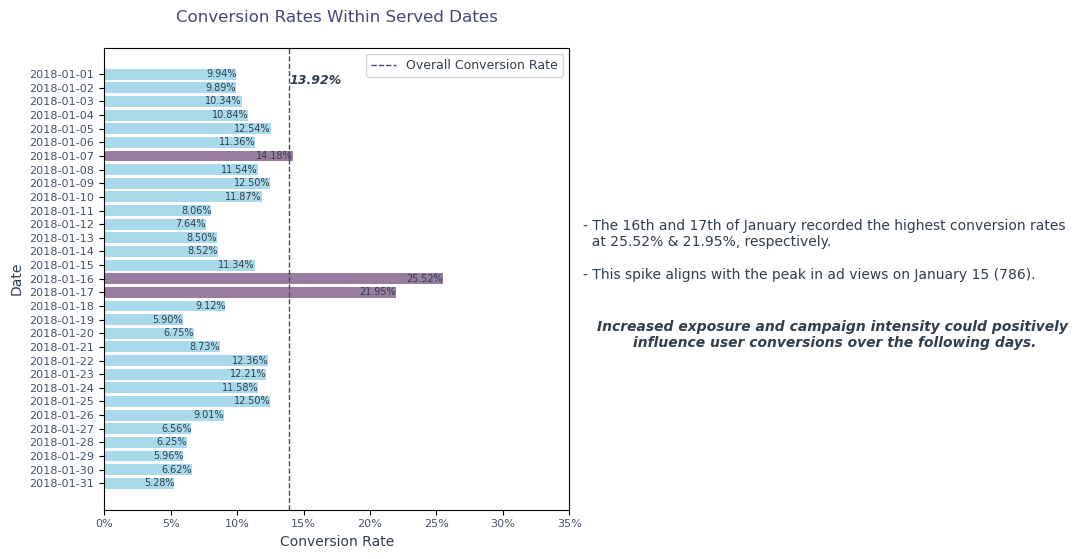

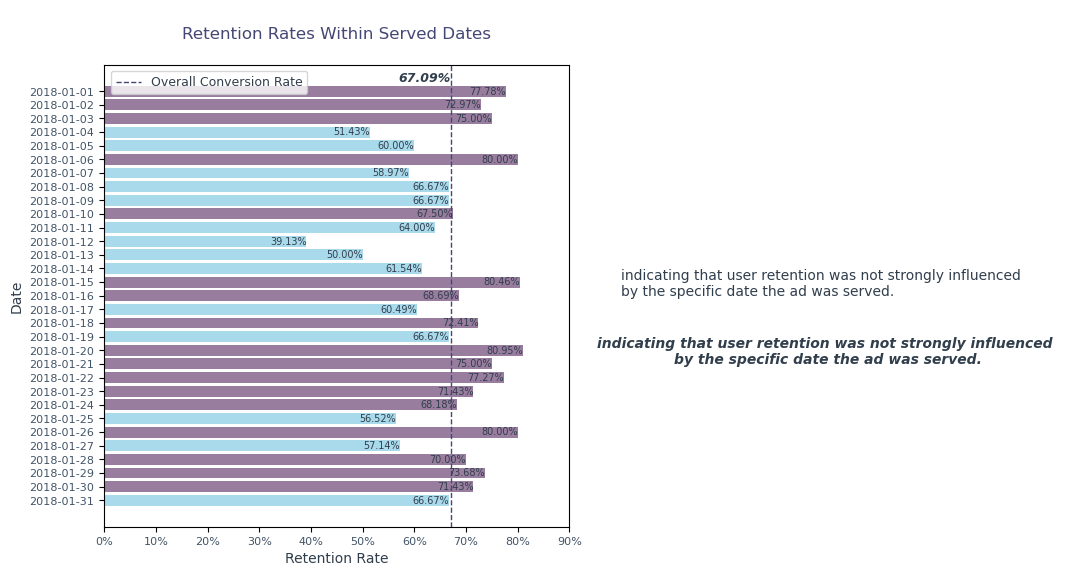

In [357]:
# 1- Visualization - Conversion Rates Within Served Dates 
# Data
con_sdate= conversion_date.date_served.astype('str').to_list()
con_sdate_rate= conversion_date.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_sdate_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.barh(con_sdate,con_sdate_rate,.8, color=colors,alpha = .8)
plt.axvline(x=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.gca().invert_yaxis()

plt.title('Conversion Rates Within Served Dates\n', fontsize=12, color='#454775')

plt.xlabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.xticks(np.arange(0,.40,.05),[f'{x:.0%}' for x in np.arange(0,.4,.05)],fontsize=8, color='#415366')

plt.ylabel('Date', fontsize=10, color='#313E4C')
plt.yticks( fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(conversion_rate,0, f'{conversion_rate:.2%}', ha= 'left', va ='top', fontsize=9, color='#313E4C', fontstyle='italic',weight='semibold')

for i,v in enumerate(con_sdate_rate):
    plt.text(v,i,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')

# Findings 
text_con_sdate=f'''
- The 16th and 17th of January recorded the highest conversion rates 
  at {con_sdate_rate.to_list()[15]:.2%} & {con_sdate_rate.to_list()[16]:.2%}, respectively.\n
- This spike aligns with the peak in ad views on January 15 ({d_u_num.max()}).'''

text2_con_sdate='''
Increased exposure and campaign intensity could positively 
influence user conversions over the following days.'''

plt.text(.36,15,text_con_sdate, color='#313E4C')
plt.text(.55,20,text2_con_sdate, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2- Visualization - Retention Rates Within Served Dates: 
# Data
ret_sdate= retention_date.date_served.astype('str').to_list()
ret_sdate_rate= retention_date.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_sdate_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.barh(ret_sdate,ret_sdate_rate,.8, color=colors,alpha = .8)
plt.axvline(x=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.gca().invert_yaxis()

plt.title('\nRetention Rates Within Served Dates\n', fontsize=12, color='#454775')

plt.xlabel('Retention Rate', fontsize=10, color='#313E4C')
plt.xticks(np.arange(0,1,.1),[f'{x:.0%}' for x in np.arange(0,1,.1)],fontsize=8, color='#415366')

plt.ylabel('Date', fontsize=10, color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(retention_rate,-0.5, f'{retention_rate:.2%}', ha= 'right', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_sdate_rate):
    plt.text(v,i,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')

# Findings 
text_ret_sdate='''
The retention rates across different dates show no clear or 
consistent pattern.'''

text_ret_sdate='''
indicating that user retention was not strongly influenced 
by the specific date the ad was served.'''

plt.text(1,15,text_ret_sdate, color='#313E4C')
plt.text(1.4,20,text_ret_sdate, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [358]:
# Comparing Conversion Rates with Retention Rates Across Service Dates
performance_date=conversion_date.merge(retention_date,on='date_served')\
                                .loc[:,['date_served','conversion_rate','retention_rate']]

performance_date.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

date_served,conversion_rate,retention_rate
2018-01-01,9.94%,77.78%
2018-01-02,9.89%,72.97%
2018-01-03,10.34%,75.00%
2018-01-04,10.84%,51.43%
2018-01-05,12.54%,60.00%
2018-01-06,11.36%,80.00%
2018-01-07,14.18%,58.97%
2018-01-08,11.54%,66.67%
2018-01-09,12.50%,66.67%
2018-01-10,11.87%,67.50%


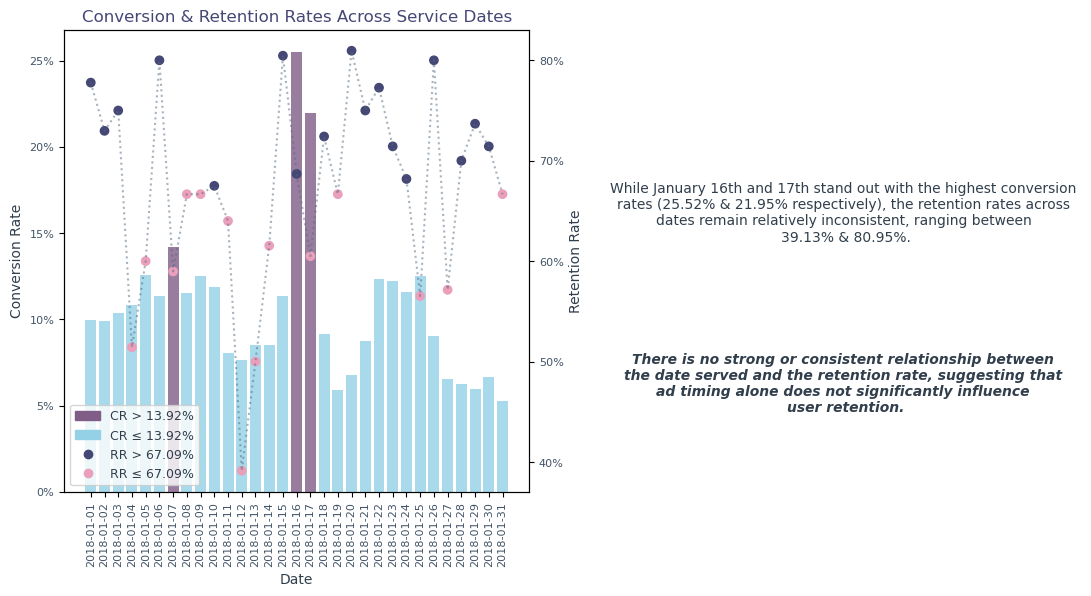

In [359]:
# Visualization - Conversion & Retention Rates Across Service Dates:
# Data
perform_sdate=performance_date.date_served.astype('str').to_list()
perform_sdate_con=performance_date.conversion_rate
perform_sdate_ret=performance_date.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_sdate_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_sdate_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6,6))

# 1- Conversion Rate (Bar)
ax1.bar(perform_sdate,perform_sdate_con, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_sdate,perform_sdate_ret, ls='dotted', color='#51687F', alpha=.5)
ax2.scatter(perform_sdate,perform_sdate_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Service Dates', fontsize=12, color='#454775')

ax1.set_xlabel('Date', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8,labelrotation=90) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C',loc='lower left')

# Findings
text_perform_sdate=f'''
While January 16th and 17th stand out with the highest conversion 
rates ({perform_sdate_con.to_list()[15]:.2%} & {perform_sdate_con.to_list()[16]:.2%} respectively), the retention rates across 
dates remain relatively inconsistent, ranging between 
{perform_sdate_ret.min():.2%} & {perform_sdate_ret.max():.2%}.'''

text2_perform_sdate='''
There is no strong or consistent relationship between 
the date served and the retention rate, suggesting that 
ad timing alone does not significantly influence 
user retention.'''

plt.text(55,.62,text_perform_sdate, color='#313E4C', ha='center')
plt.text(55,.45,text2_perform_sdate, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

### $\color{#454775}{Q2:}$ ***Is there evidence that multi-touch exposure (users seeing multiple ads) improves conversion or retention rates?***


In [360]:
# Calculating Conversion Rate across single & multi-touch exposure
converted_exposure=converted_users.groupby('ad_repeated').user_id.nunique().reset_index()\
                                  .rename(columns={'ad_repeated':'ad_exposure','user_id':'converted'})

users_exposure = marketing.groupby('ad_repeated').user_id.nunique().reset_index()\
                          .rename(columns={'ad_repeated':'ad_exposure','user_id':'total_users'})

conversion_exposure =users_exposure.merge(converted_exposure, on ='ad_exposure')

conversion_exposure['conversion_rate']=conversion_exposure['converted']/conversion_exposure['total_users']

conversion_exposure['ad_exposure']= np.where(conversion_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

conversion_exposure.style.hide().format({'conversion_rate':'{:,.2%}'})


ad_exposure,total_users,converted,conversion_rate
single_exposure,5038,439,8.71%
multi_exposure,2256,576,25.53%


In [361]:
# Calculating Retention Rate across single & multi-touch exposure
retained_exposure=retained_users.groupby('ad_repeated').user_id.nunique().reset_index()\
                                .rename(columns={'ad_repeated':'ad_exposure','user_id':'retained'})

retention_exposure= converted_exposure.merge(retained_exposure, on='ad_exposure')

retention_exposure['retention_rate']=retention_exposure['retained']/retention_exposure['converted']

retention_exposure['ad_exposure']= np.where(retention_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

retention_exposure.style.hide().format({'retention_rate':'{:,.2%}'})

ad_exposure,converted,retained,retention_rate
single_exposure,439,279,63.55%
multi_exposure,576,402,69.79%


In [362]:
# merging conversion & retention dates across single & multi-touch exposure
performance_exposure=conversion_exposure.merge(retention_exposure,on='ad_exposure')\
                                        .loc[:,['ad_exposure','conversion_rate','retention_rate']]\
                                        .sort_values('conversion_rate', ascending=False)

performance_exposure.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

ad_exposure,conversion_rate,retention_rate
multi_exposure,25.53%,69.79%
single_exposure,8.71%,63.55%


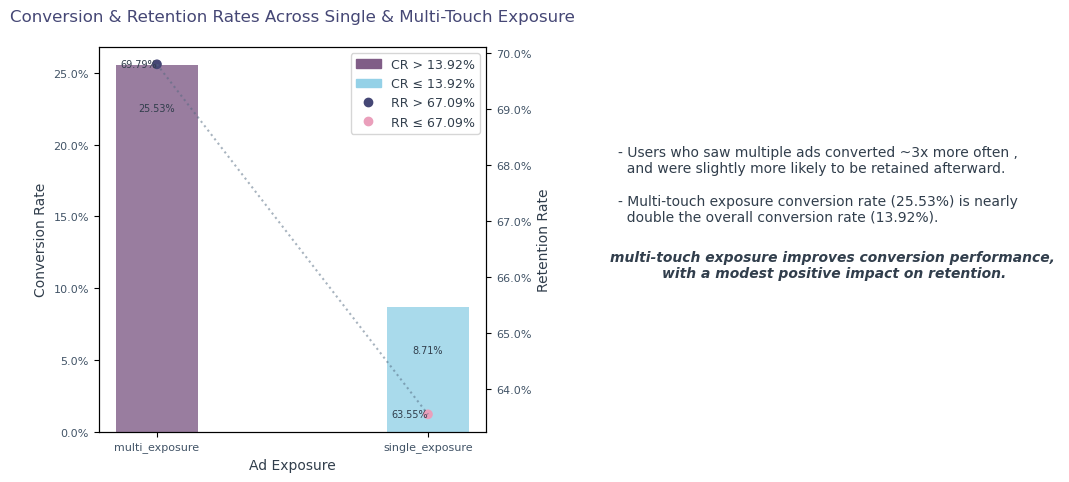

In [363]:
# Visualization - Conversion & Retention Rates Across Single & Multi-Touch Exposure:
# Data
perform_exposure=performance_exposure.ad_exposure.to_list()
perform_exposure_con=performance_exposure.conversion_rate
perform_exposure_ret=performance_exposure.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_exposure_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_exposure_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_exposure,perform_exposure_con,.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_exposure,perform_exposure_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_exposure,perform_exposure_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Single & Multi-Touch Exposure\n', fontsize=12, color='#454775')

ax1.set_xlabel('Ad Exposure', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C',loc='upper right')

# Annotating chart with values
for r,s in enumerate(perform_exposure_con):
    ax1.text(r,s-.03,f'{s:.2%}',va='center',ha='center', fontsize=7, color='#313E4C')

for i,v in enumerate(perform_exposure_ret):
    ax2.text(i,v,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')
    
# Findings
text_perform_exposure=f'''
- Users who saw multiple ads converted ~3x more often ,
  and were slightly more likely to be retained afterward.\n
- Multi-touch exposure conversion rate ({perform_exposure_con.max():.2%}) is nearly 
  double the overall conversion rate ({conversion_rate:.2%}).'''

text2_perform_exposure='''
multi-touch exposure improves conversion performance, 
with a modest positive impact on retention.'''

plt.text(1.7,.67,text_perform_exposure, color='#313E4C', ha='left')
plt.text(2.5,.66,text2_perform_exposure, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

>$\color{#454775}{Note}:$<br>
>_Around 70% of unique users (~5,000) were exposed to the ad only once. This large proportion could be aligned with the extensive ad distribution through House Ads, which had the lowest conversion (7.51%) and retention (58.05%) rates._

In [364]:
# Single & Multi-Exposures Across Marketing Channels:
users_exposure_house = marketing.groupby(['ad_repeated','is_house_ad']).user_id.nunique().reset_index()\
                                .rename(columns={'ad_repeated':'ad_exposure','is_house_ad':'ad_type','user_id':'total_users'})

users_exposure_house['ad_exposure']=np.where(users_exposure_house['ad_exposure']==True,'multi_exposure','single_exposure')

users_exposure_house['ad_type']=np.where(users_exposure_house['ad_type']==True,'house_ad','others')

users_exposure_house =users_exposure_house.pivot_table(values='total_users', index='ad_type', columns='ad_exposure')\
                                          .apply(lambda x: x/sum(x)).reset_index()

users_exposure_house.style.hide().format({'multi_exposure':'{:,.2%}','single_exposure':'{:,.2%}'})

ad_type,multi_exposure,single_exposure
house_ad,49.45%,44.18%
others,50.55%,55.82%


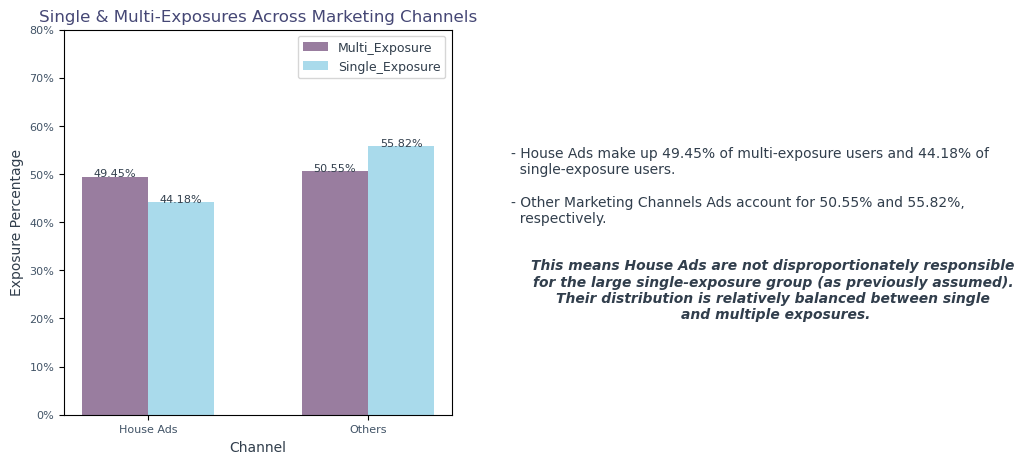

In [365]:
# Visualization - Single & Multi-Exposures Across Marketing Channels:
#Data:
x=np.arange(len(users_exposure_house.ad_type))
y=users_exposure_house.multi_exposure
z=users_exposure_house.single_exposure

# Creating the Chart:
plt.subplots(figsize=(5,5))
width=.3
location=x+width/2

# 1- Multi-Exposure:
plt.bar(x,y,width, label='Multi_Exposure',color='#805D87', alpha=.8)

# 2- Single-Exposure:
plt.bar(x+width,z,width,label='Single_Exposure',color='#94D1E7',alpha=.8)

# Customizing the Chart:
plt.title('Single & Multi-Exposures Across Marketing Channels', fontsize=12, color='#454775')

plt.xlabel('Channel', fontsize=10, color='#313E4c')
plt.xticks(location, ['House Ads', 'Others'], fontsize=8, color='#415366')

plt.ylabel('Exposure Percentage', fontsize=10, color='#313E4c')
plt.yticks(np.arange(0,.9,.1), [f'{y:.0%}' for y in np.arange(0,.9,.1)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C',loc='upper right')

# Annotating Values to the Chart:
for i,v in enumerate(y):
    plt.text(i,v,f'{v:,.2%}', ha='center', fontsize=8, color='#313E4c')

for r,s in enumerate(z):
    plt.text(r+width,s,f'{s:,.2%}', ha='center', fontsize=8, color='#313E4c')

# Findings:
text1= f'''
- House Ads make up {y.to_list()[0]:.2%} of multi-exposure users and {z.to_list()[0]:.2%} of 
  single-exposure users.\n
- Other Marketing Channels Ads account for {y.to_list()[1]:.2%} and {z.to_list()[1]:.2%}, 
  respectively.'''
text2=''' 
This means House Ads are not disproportionately responsible 
for the large single-exposure group (as previously assumed). 
Their distribution is relatively balanced between single 
and multiple exposures.'''
plt.text(1.8,.4,text1, color='#313E4C', ha='left')
plt.text(3,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

### $\color{#454775}{\sf Audience\;and\;Channel\;Interaction:}$
### $\color{#454775}{Q3:}$ ***Which combinations of age group and marketing channel yield the highest conversion rates?***


In [366]:
# Calculating the Conversion Rates for the combinations of Marketing Channels & Age groups
converted_ch_age=converted_users.groupby(['marketing_channel','age_group']).user_id.nunique().reset_index()\
                                .rename(columns={'user_id':'converted'})

users_ch_age=marketing.groupby(['marketing_channel','age_group']).user_id.nunique().reset_index()\
                      .rename(columns={'user_id':'total_users'})

conversion_ch_age= users_ch_age.merge(converted_ch_age, on=['marketing_channel','age_group'])

conversion_ch_age['conversion_rate']= conversion_ch_age['converted']/conversion_ch_age['total_users']

conversion_ch_age=conversion_ch_age.loc[:,['marketing_channel', 'age_group','conversion_rate']]\
                                   .pivot_table(values='conversion_rate', index='age_group',columns='marketing_channel')

conversion_ch_age.style.format('{:,.2%}')

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,40.66%,17.19%,9.91%,13.01%,8.15%
19-24 years,45.79%,23.26%,9.02%,31.23%,17.36%
24-30 years,44.83%,16.61%,9.88%,18.66%,11.11%
30-36 years,21.67%,7.14%,5.17%,4.76%,4.82%
36-45 years,19.05%,5.99%,6.14%,5.60%,1.56%
45-55 years,21.88%,3.11%,5.47%,7.34%,6.10%
55+ years,18.87%,9.14%,5.76%,6.53%,5.13%


In [367]:
# Calculating Retention Rate for the combinations of Marketing Channels & Age groups
retained_ch_age=retained_users.groupby(['marketing_channel','age_group']).user_id.nunique().reset_index()\
                                .rename(columns={'user_id':'retained'})

retention_ch_age= converted_ch_age.merge(retained_ch_age, on=['marketing_channel','age_group'])

retention_ch_age['retention_rate']=retention_ch_age['retained']/retention_ch_age['converted']

retention_ch_age=retention_ch_age.loc[:,['marketing_channel', 'age_group','retention_rate']]\
                                   .pivot_table(values='retention_rate', index='age_group',columns='marketing_channel')
retention_ch_age.index=retention_ch_age.index.str.replace(' years','')

retention_ch_age.style.format('{:,.2%}')

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18,83.78%,63.64%,60.34%,57.89%,80.00%
19-24,75.51%,77.92%,58.62%,69.15%,68.00%
24-30,82.69%,56.25%,58.62%,72.00%,65.00%
30-36,84.62%,64.71%,61.29%,75.00%,75.00%
36-45,58.33%,84.62%,54.84%,60.00%,66.67%
45-55,57.14%,77.78%,51.61%,75.00%,80.00%
55+,70.00%,68.75%,58.06%,84.62%,66.67%


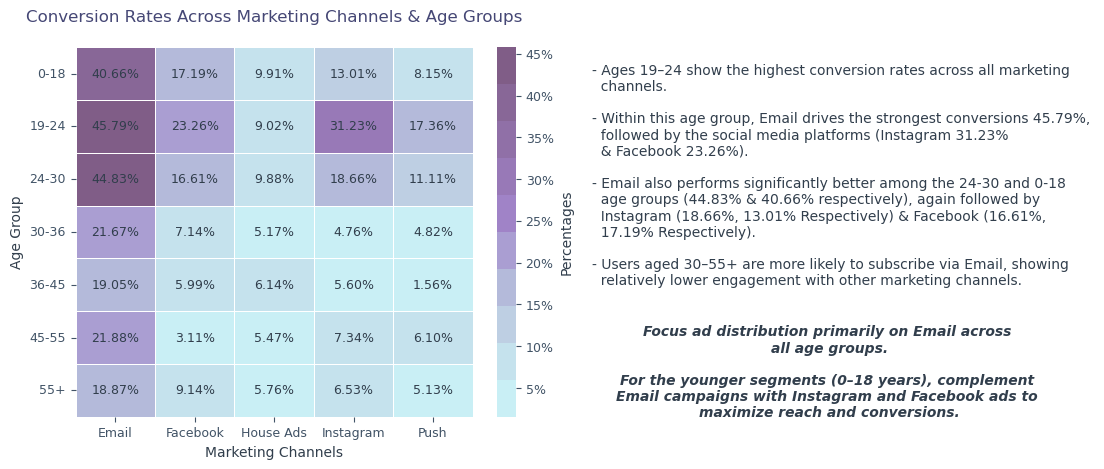

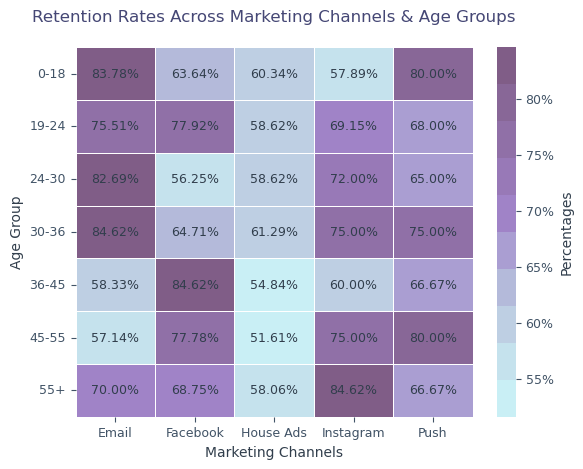

In [426]:
# 1- Visualiztion - Conversion Rates Across Marketing Channels & Age Groups
# Data
palette_10 = sns.color_palette(['#C9EFF5', '#C5E2ED', '#BECFE3', '#B4BADA', '#AA9ED2', '#A083C7', '#9879B7', '#9070A7', '#886797', '#805D87'])
age_ticks=[x.replace(' years','') for x in conversion_ch_age.index.to_list()]

# Creating the Chart:
ax=sns.heatmap(conversion_ch_age, cmap=palette_10, annot=True, fmt=".2%", annot_kws={'color':'#313E4c','fontsize':9},
               linewidths=.4, yticklabels=age_ticks)

# Customizing the Chart:
plt.title('Conversion Rates Across Marketing Channels & Age Groups\n', fontsize=12, color='#454775')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
cbar.set_label('Percentages', fontsize=10, color='#313E4c')
cbar.ax.tick_params(labelsize=9, colors='#415366')

ax.set_xlabel('Marketing Channels',fontsize=10, color='#313E4c')
ax.set_ylabel('Age Group',fontsize=10, color='#313E4c')
ax.tick_params(axis='both',labelsize=9, colors='#415366',labelrotation=0)

# Findings:
text_ch_a_con=f''' 
- Ages 19–24 show the highest conversion rates across all marketing 
  channels.\n
- Within this age group, Email drives the strongest conversions {conversion_ch_age.loc['19-24 years','Email']:.2%}, 
  followed by the social media platforms (Instagram {conversion_ch_age.loc['19-24 years','Instagram']:.2%} 
  & Facebook {conversion_ch_age.loc['19-24 years','Facebook']:.2%}).\n
- Email also performs significantly better among the 24-30 and 0-18 
  age groups ({conversion_ch_age.loc['24-30 years','Email']:.2%} & {conversion_ch_age.loc['0-18 years','Email']:.2%} respectively), again followed by 
  Instagram ({conversion_ch_age.loc['24-30 years','Instagram']:.2%}, {conversion_ch_age.loc['0-18 years','Instagram']:.2%} Respectively) & Facebook ({conversion_ch_age.loc['24-30 years','Facebook']:.2%}, 
  {conversion_ch_age.loc['0-18 years','Facebook']:.2%} Respectively).\n
- Users aged 30–55+ are more likely to subscribe via Email, showing 
  relatively lower engagement with other marketing channels.'''
text2_ch_a_con = '''
Focus ad distribution primarily on Email across 
all age groups.\n
For the younger segments (0–18 years), complement 
Email campaigns with Instagram and Facebook ads to 
maximize reach and conversions.'''
ax.text(6.5,4.5,text_ch_a_con, color='#313E4C', ha='left')
ax.text(9.5,7,text2_ch_a_con, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show()

# 1- Visualiztion - Retention Rates Across Marketing Channels & Age Groups
# Data
age_ticks=[x.replace(' years','') for x in retention_ch_age.index.to_list()]

# Creating the Chart:
ax=sns.heatmap(retention_ch_age, cmap=palette_10, annot=True, fmt=".2%", annot_kws={'color':'#313E4c','fontsize':9},
               linewidths=.4, yticklabels=age_ticks)

# Customizing the Chart:
plt.title('Retention Rates Across Marketing Channels & Age Groups\n', fontsize=12, color='#454775')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
cbar.set_label('Percentages', fontsize=10, color='#313E4c')
cbar.ax.tick_params(labelsize=9, colors='#415366')

ax.set_xlabel('Marketing Channels',fontsize=10, color='#313E4c')
ax.set_ylabel('Age Group',fontsize=10, color='#313E4c')
ax.tick_params(axis='both',labelsize=9, colors='#415366',labelrotation=0)

# Findings:
text_ch_a_con=f''' 
- Ages 19–24 show the highest conversion rates across all marketing 
  channels.\n
- Within this age group, Email drives the strongest conversions {conversion_ch_age.loc['19-24 years','Email']:.2%}, 
  followed by the social media platforms (Instagram {conversion_ch_age.loc['19-24 years','Instagram']:.2%} 
  & Facebook {conversion_ch_age.loc['19-24 years','Facebook']:.2%}).\n
- Email also performs significantly better among the 24-30 and 0-18 
  age groups ({conversion_ch_age.loc['24-30 years','Email']:.2%} & {conversion_ch_age.loc['0-18 years','Email']:.2%} respectively), again followed by 
  Instagram ({conversion_ch_age.loc['24-30 years','Instagram']:.2%}, {conversion_ch_age.loc['0-18 years','Instagram']:.2%} Respectively) & Facebook ({conversion_ch_age.loc['24-30 years','Facebook']:.2%}, 
  {conversion_ch_age.loc['0-18 years','Facebook']:.2%} Respectively).\n
- Users aged 30–55+ are more likely to subscribe via Email, showing 
  relatively lower engagement with other marketing channels.'''
text2_ch_a_con = '''
Focus ad distribution primarily on Email across 
all age groups.\n
For the younger segments (0–18 years), complement 
Email campaigns with Instagram and Facebook ads to 
maximize reach and conversions.'''
#ax.text(6.5,4.5,text_ch_a_con, color='#313E4C', ha='left')
#ax.text(9.5,7,text2_ch_a_con, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show()

In [369]:
converted_ch_age=converted_users.groupby(['marketing_channel','age_group']).user_id.nunique().reset_index()\
                             .rename(columns={'ad_repeated':'ad_exposure','user_id':'converted'})

users_exposure = marketing.groupby('ad_repeated').user_id.nunique().reset_index()\
                    .rename(columns={'ad_repeated':'ad_exposure','user_id':'total_users'})

conversion_exposure =users_exposure.merge(converted_exposure, on ='ad_exposure')

conversion_exposure['conversion_rate']=conversion_exposure['converted']/conversion_exposure['total_users']

conversion_exposure['ad_exposure']= np.where(conversion_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

conversion_exposure.style.hide().format({'conversion_rate':'{:,.2%}'})

ad_exposure,total_users,converted,conversion_rate
single_exposure,5038,439,8.71%
multi_exposure,2256,576,25.53%


In [370]:
conversion_ch_age.index.to_list()

['0-18 years',
 '19-24 years',
 '24-30 years',
 '30-36 years',
 '36-45 years',
 '45-55 years',
 '55+ years']

In [371]:
[x.replace(' years','') for x in conversion_ch_age.index.to_list()]

['0-18', '19-24', '24-30', '30-36', '36-45', '45-55', '55+']

In [389]:
f"{(conversion_ch_age.loc['19-24 years','Email']):.2%}"

'45.79%'

In [387]:
conversion_ch_age.loc['19-24 years','Email'].format('.2%')

AttributeError: 'numpy.float64' object has no attribute 'format'